<a href="https://colab.research.google.com/github/Ruchir555/State-Transfer-between-CV-Bosonic-Modes-and-Qubits/blob/main/T_parameter_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program finds the $t$-parameters between an arbitrary numerical sequence of vectors following the majorization condition. This is done in the function t_parameters(x, y). Firstly, it sorts the vectors $x$ & $y$ into descending order, after which it checks whether or not the vectors actually obey the majorization relation ($x \prec y$), and if they are the same length. Then, it finds the k index such that $y_k \leq x_1 \leq y_{k-1}$, such that we can write the respective t-parameter as:

$$
t = \frac{x_1-y_k}{y_1-y_k}
$$

This process is repeated with all the reduced vectors (obtained by removing the first element of the vector and transforming the $k$-th element of y as $(t\cdot y_k + (1-t)\cdot y_1)$), such that ($d-1$) $t$-parameters are found for vectors of length $d$. 

This program has several helper functions (sum_arr_till_index(arr, idx), isMajorized(x,y), bubbleSort(arr), find_k_idx(x,y)) which are fairly straightforward, but explained below nevertheless. 

In [2]:
def bubbleSort(arr):  #Sort in descending order, O(n^2)
    n = len(arr)
    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] < arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

#Test code:
x = [5, 3, 2, 9, 10, 19, 110]
print(bubbleSort(x))

[110, 19, 10, 9, 5, 3, 2]


In [3]:
def sum_arr_till_index(arr, idx): #sum an array from index 0 to idx
  sum = 0
  for i in range(0,idx):
    sum += arr[i]
  return sum


def isMajorized(x,y): #check if x is majorized by y
  if (len(x)!= len(y)):
    return False

  isTrue = 1  #1 == True, 0 == False
  x = bubbleSort(x)
  y = bubbleSort(y)

  for k in range(0,len(x)+1):
    if (sum_arr_till_index(x,k) <= sum_arr_till_index(y,k)):  #Majorization def'n
      isTrue*=1
    else:
      isTrue *= 0
  return isTrue==1  #returns 0 if false (does not y majorize x), 1 if true (y majorizes x)


# Test Code:
A = [2, 3, 5, 3, 2]
B = [3, 1, 6, 2, 3]
print(isMajorized(A,B))
# isMajorized(B,A)
sum_arr_till_index(A,len(A))

True


15

In [4]:
def find_k_idx(x,y, reOrder = False): #Find the k-index such that y_k <= x_1 <= y_{k-1}.
  if (reOrder == True):   #don't automatically sort
    x = bubbleSort(x)
    y = bubbleSort(y)

  else:
    x1 = x[0]

    for k in range(1, len(y)):
      if (y[k] <= x1 <= y[k-1]):
        return k

# Test Code:
xx = [100, 50, 25, 25, 0]
yy = [125, 25, 25, 25, 0]
# find_k_idx(xx,yy)
X = [5, 10, 15, 20]
Y = [7, 8, 1, 34]
# find_k_idx(X,Y)
X, Y = bubbleSort(X[1:]), bubbleSort(Y[1:])
print(find_k_idx(X,Y))
yY = [15,10,5]
xX = [8,7,1]
print(find_k_idx(xX[1:], yY[1:]))

1
1


In [5]:
def t_parameters(x, y, checkMajorization = False, checkLength = True, print_vals = False): # x majorized by y; finds t-parameters such that x = Dy, D = T_r...T_2 T_1
  # First sort vectors into descending order
  x_copy =  bubbleSort(x) 
  y_copy = bubbleSort(y)
  t_parameters_list = []
  index_choice_list = []  #which index is chosen at each reduced vector step

  if (checkLength ==True):
    if (len(x)!= len(y)):
      print("Unequal lengths \n")
      return False  #or break?
  if (checkMajorization==True):
    if (isMajorized(x,y)==False):
      print("Not majorized \n")
      return t_parameters_list, index_choice_list  #or break?

  # y_n <= x_1 <= y_1 and y_k <= x_1 <= y_{k-1}
  # Therefore x_1 = t*y_1 + (1-t)*y_k
  # Therefore t = (x_1-y_k)/(y_1-y_k)
  i=0
  k=0
  t=0
  while i < len(x)-1: #iterate appropriate amount of times (1 less than dimension of x,y)
    if (print_vals==True):
      print('x', x_copy)
      print('y', y_copy)
    k = find_k_idx(x_copy, y_copy)  #Find appropriate k index
    if (print_vals==True):
      print('k', k+1)
    index_choice_list.append(k+1) #append index choice; k+1 because Python starts from 0
    t = (x_copy[0]-y_copy[k])/(y_copy[0]-y_copy[k]) #Write down t
    t_parameters_list.append(t)  #Append t to list
    old_yk = y_copy[k]
    y_copy[k] = t*y_copy[k] + (1-t)*y_copy[0] #Change k-th index entry according to T-transform
    y_copy[0] = t*y_copy[0] + (1-t)*old_yk #Change 0-th index entry according to T-transform
    if (print_vals==True):
      print('x_after', x_copy)
      print('y_after', y_copy)
    y_copy = y_copy[1:] # Pop the first index to get reduced vector
    x_copy = x_copy[1:] # Pop the first index to get reduced vector
    i+=1

    if (t>1 or t<0):  #out of bounds t condition
      print("Incorrect t obtained \n")
      return False  #or break?

  return t_parameters_list, index_choice_list


# Test Code:
X = [5, 10, 15, 20]
Y = [7, 8, 1, 34]
tparams1, indices1 = t_parameters(X,Y)
print('Example 1:', tparams1, '\n')  #[0.46153846153846156, 0.5333333333333333, 0.6923076923076923] 

Xx = [1/2, 2/5, 1/10]
Yy = [3/5, 1/5, 1/5]
tparams2, indices2 = t_parameters(Xx,Yy, checkMajorization=True)
print('Example 2:', tparams2, '\n')  #Nielsen example, not majorized

a = [5, 3, 2]
b = [6, 3, 1]
tparams3, indices3 = t_parameters(a,b)
print('Example 3:', tparams3, '\n')  #[0.6666666666666666, 0.6666666666666666] 

# 5D pseudo-TMS->Bell state case:
lamb = .75  #lambda = tanh(r), in this case lamb>=0.72 for majorization condition
N = 1 + lamb**2 + lamb**4 + lamb**6 + lamb**8 #normalization
pseudoTMS5D = [1/N, lamb**2/N, lamb**4/N, lamb**6/N, lamb**8/N]
Bell = [1/2, 1/2, 0, 0, 0]
tparams4, indices4 = t_parameters(pseudoTMS5D,Bell)
print('pseudoTMS5D->Bell:', tparams4, '\n') #[0.927214719760047, 0.4840011596679688, 0.5322245322245323, 0.6400000000000001] 
print('pseudoTMS5D->Bell: Index choice:',indices4)

Example 1: [0.46153846153846156, 0.5333333333333333, 0.6923076923076923] 

Not majorized 

Example 2: [] 

Example 3: [0.6666666666666666, 0.6666666666666666] 

pseudoTMS5D->Bell: [0.927214719760047, 0.4840011596679688, 0.5322245322245323, 0.6400000000000001] 

pseudoTMS5D->Bell: Index choice: [3, 2, 2, 2]


In [6]:
from math import tanh, atanh, sqrt

def generateTMSSvector(r, N, renormalize = False): #generates an N-length TMSS vector (renormalized) with squeezing parameter r
  lamb = tanh(r)
  r_min = atanh(1/sqrt(2))
  if r < r_min:
    print("Less than minimum r by Nielsen criteria \n")
    return False

  TMSSvector = [0]*N  #instantiate

  for i in range (0, N):
    TMSSvector[i] = (1-lamb**2)*(lamb)**(2*i) #generate

  reduced_vector_sum = sum_arr_till_index(TMSSvector, N)

  if (renormalize == True): 
    for j in range (0, N):  #renormalize
      TMSSvector[j] = TMSSvector[j]/reduced_vector_sum

  return TMSSvector


def generateBellstate_reduced(N): #generates an N-length Bell-state vector 
  bellStatearray = [0]*N
  bellStatearray[0] = 1/2
  bellStatearray[1] = 1/2

  return bellStatearray

# Test Code:
print('Example 1:', generateTMSSvector(.5, 10)) #False
print('Example 2:', generateTMSSvector(1, 10, renormalize=True))
print('Example 3:', generateTMSSvector(atanh(.75), 5))
print('Example 4:', generateBellstate_reduced(5))

Less than minimum r by Nielsen criteria 

Example 1: False
Example 2: [0.42179224436615365, 0.24465032424057584, 0.141903465391982, 0.08230765094123561, 0.04774054942739311, 0.027690743613331813, 0.016061341795519987, 0.00931599034950864, 0.005403513435991128, 0.0031341764383082103]
Example 3: [0.4375, 0.24609375, 0.138427734375, 0.0778656005859375, 0.043799400329589844]
Example 4: [0.5, 0.5, 0, 0, 0]


x [0.11640000000000006, 0.10285104000000005, 0.09087917894400002, 0.08030084251491841, 0.0709538244461819, 0.06269479928064632, 0.055397124644379084, 0.04894889933577335, 0.04325124745308933, 0.03821680224954973, 0.033768366467702135, 0.029837728610861602, 0.026364617000557308, 0.023295775581692435, 0.020584147303983436, 0.01818815255779976, 0.016071051600071867, 0.014200381193823499, 0.012547456822862443, 0.011086932848681253]
y [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k 3
x_after [0.11640000000000006, 0.10285104000000005, 0.09087917894400002, 0.08030084251491841, 0.0709538244461819, 0.06269479928064632, 0.055397124644379084, 0.04894889933577335, 0.04325124745308933, 0.03821680224954973, 0.033768366467702135, 0.029837728610861602, 0.026364617000557308, 0.023295775581692435, 0.020584147303983436, 0.01818815255779976, 0.016071051600071867, 0.014200381193823499, 0.012547456822862443, 0.011086932848681253]
y_after [0.11640000000000006, 0.5, 0.38359999999999994, 

[]

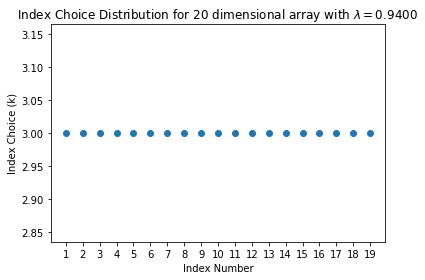

In [7]:
# Check the index distribution of the TMSS --> Bell state conversion for several lambda

import matplotlib.pyplot as plt

lamb = 0.94  #0.86, 2**(-0.5)
r = atanh(lamb) #lambda = tanh(r), in this case lamb>=0.71 (r>=0.88) for majorization condition
N = 20 #dimension
pseudoTMSND = generateTMSSvector(r, N, renormalize=False)
BellN_1 = generateBellstate_reduced(N+1)  #generate one larger than pseudoTMSND so that the last k-index is found (artefact of the code)
tparamsN, indicesN = t_parameters(pseudoTMSND,BellN_1, checkMajorization=False, checkLength=False, print_vals=True)
print('pseudoTMSND->Bell t parameters:', tparamsN, '\n') 
print('pseudoTMSND->Bell: Index choice:',indicesN)


# Check which type of index choice it is (k=2 or k=3, or neither), and print:
k2_idx_list = [2]*(N-1)
k2_idx_list[0] = 3
k3_idx_list = [3]*(N-1)
if (indicesN==k2_idx_list):
  print('LIST TYPE: k=2')
if (indicesN==k3_idx_list):
  print('LIST TYPE: k=3')
else:
  print('LIST TYPE: Neither k=2 nor k=3 type')


# Plot
idx_array = [i for i in range(1,len(indicesN)+1)] #generate an indices number array (index 1, index 2, ..., index N)
plt.scatter(idx_array, indicesN)
plt.xticks(idx_array)
# plt.yticks(indicesN)  #new
# plt.yaxis.get_major_locator().set_params(integer=True)
plt.title('Index Choice Distribution for '+ str(N)+ r' dimensional array with $\lambda = $'+ str(format(tanh(r),'0.4f')))
plt.xlabel('Index Number')
plt.ylabel('Index Choice (k)')
plt.plot()


In [8]:
sum_arr_till_index(pseudoTMSND,N)
r

1.7380493449176362

In [9]:
def gen_Bn_sequence(Lamb, N):  #numerically sums the entries of the N-times transformed B-vector
  mult = (1-Lamb**2)**.5  #multiplication coefficient 
  accum = Lamb**N #1st term
  
  for i in range(0,N):  # 0,1,...,N-1
    accum += mult*Lamb**i
  return accum

gen_Bn_sequence(0.8, 10)
gen_Bn_sequence(0.8, 1)

1.4

In [10]:
def find_k_idx_2(x, y, first_x_idx = 0, reOrder = False): #Find the k-index such that y_k <= x_1 <= y_{k-1}.
  if (reOrder == True):   #don't automatically sort
    x = bubbleSort(x)
    y = bubbleSort(y)
 
  else:
    # x1 = x[0]
    x1 = x[first_x_idx]

    for k in range(first_x_idx, len(y)):
      if (y[k] <= x1 <= y[k-1]):
        return k

# Test Code:
xx = [55, 25, 15, 5]
yy = [60, 30, 5, 5]
print(find_k_idx_2(xx, yy, 2))

2


In [11]:
# Get entanglement entropy of the vector of schmidt coefficients; do a single t-transform
import math

def entanglement_entropy_schmidt_form(vec): #takes in a vector of schmidt coefficients (lambda) for state |psi> = Sum_k sqrt{lambda} |kk>
  # Assume the vector is already sorted in the computational basis
  entanglement_entropy = 0

  for i in range(0, len(vec)):
    if vec[i] != 0:
      entanglement_entropy += -(vec[i]*math.log(vec[i], 2)) #log base 2

  return entanglement_entropy

# Test:
# b = (1/2, 1/2, 0, 0, 0)
# print(entanglement_entropy_schmidt_form(b))

def single_t_transform(x, y, checkMajorization = False, checkLength = True):  #does a single t-transform, returning the k-index choice, t-parameter, and the transformed vector
  # First sort vectors into descending order
  # x_copy =  bubbleSort(x) 
  # y_copy = bubbleSort(y)
  x_copy =  x
  y_copy = y
  t_parameter = 0
  index_choice = 0  #which index is chosen at each reduced vector step
  transformed_y = []
  epsilon = 0.001 #initial error tolerance for detecting mismatching terms

  if (checkLength ==True):
    if (len(x)!= len(y)):
      print("Unequal lengths \n")
      return False  #or break?
  if (checkMajorization==True):
    if (isMajorized(x,y)==False):
      print("Not majorized \n")
      return t_parameter, index_choice

  proceed_to_transform = True  
  primary_index = 0 #first mismatching term, i.e. B^n_1 (y[0]) used in the T-transformation
  brk=0 #break condition, 0==don't break, 1==break (in loop)
  i = 0
  while brk == 0:
    if (y_copy[0:-1] == x_copy): #if sorted and last elements are equal then no need to transform anymore, so set primary index to -1 (nonsense)
      # primary_index = -1
      # print("primary index:", primary_index)
      proceed_to_transform = False  #change to false
      brk = 1 
    if (brk==0):
      # if (i<= len(x_copy)-1):
      if (y_copy[i]!=x_copy[i]):  #check which index is mismatching and that is the first index to transform    #abs(y_copy[i]-x_copy[i])>epsilon
        print("i: ", i)
        difference = abs(y_copy[i]-x_copy[i])
        print("difference: ", difference, 'i: ', i)
        epsilon = (abs(x_copy[i]))/(2*10**3)
        print('epsilon: ', epsilon)
        print("Difference > Epsilon?", difference>epsilon)  #if this is true then there is a true difference and not just a rounding error
        if (difference>epsilon):
          primary_index = i
          brk = 1
      # if (i >= len(x_copy)):  #because y_copy is one longer than x_copy in order for the T-transform to work
        # brk = 1
      i+=1
  print("primary index:", primary_index)

  if (proceed_to_transform==True):
    # y_n <= x_1 <= y_1 and y_k <= x_1 <= y_{k-1}
    # Therefore x_1 = t*y_1 + (1-t)*y_k
    # Therefore t = (x_1-y_k)/(y_1-y_k)
    index_choice = find_k_idx_2(x_copy, y_copy, primary_index)  #Find appropriate k index
    print('k:', index_choice+1 - primary_index)
    t_parameter = (x_copy[primary_index]-y_copy[index_choice])/(y_copy[primary_index]-y_copy[index_choice]) #Write down t
    old_yk = y_copy[index_choice]
    y_copy[index_choice] = t_parameter*y_copy[index_choice] + (1-t_parameter)*y_copy[primary_index] #Change k-th index entry according to T-transform
    y_copy[primary_index] = t_parameter*y_copy[primary_index] + (1-t_parameter)*old_yk #Change 0-th index entry according to T-transform
    print('x_after', x_copy)
    print('y_after', y_copy)
    # y_copy = y_copy[1:] # Pop the first index to get reduced vector
    # x_copy = x_copy[1:] # Pop the first index to get reduced vector
    transformed_y = y_copy
  
  if (proceed_to_transform==False):
    transformed_y = y
    index_choice = None
    t_parameter = None

  if (t_parameter>1 or t_parameter<0):  #out of bounds t condition
    print("Incorrect t obtained \n:", t_parameter)
    return False  

  return t_parameter, index_choice, transformed_y

# Test:
# Test Code:
X = bubbleSort([5, 10, 15, 20])
Y = bubbleSort([7, 8, 1, 34])
tparams1, indices1, newY = single_t_transform(X,Y)
print('t:', tparams1)  #[0.46153846153846156, 0.5333333333333333, 0.6923076923076923] 
print('Entanglement Entropy', entanglement_entropy_schmidt_form(newY), '\n')
tparams2, indices2, newY2 = single_t_transform(X,newY)
print('t:', tparams2)
print('Entanglement Entropy', entanglement_entropy_schmidt_form(newY2), '\n')
tparams3, indices3, newY3 = single_t_transform(X,newY2)
print('t:', tparams3)
print('Entanglement Entropy', entanglement_entropy_schmidt_form(newY3), '\n')


entanglement_entropy_schmidt_form([1/2, 1/2, 0])

i:  0
difference:  14 i:  0
epsilon:  0.01
Difference > Epsilon? True
primary index: 0
k: 2
x_after [20, 15, 10, 5]
y_after [20.0, 22.0, 7, 1]
t: 0.46153846153846156
Entanglement Entropy -204.19754196217102 

i:  1
difference:  7.0 i:  1
epsilon:  0.0075
Difference > Epsilon? True
primary index: 1
k: 2
x_after [20, 15, 10, 5]
y_after [20.0, 15.0, 14.0, 1]
t: 0.5333333333333333
Entanglement Entropy -198.34488974068148 

i:  2
difference:  4.0 i:  2
epsilon:  0.005
Difference > Epsilon? True
primary index: 2
k: 2
x_after [20, 15, 10, 5]
y_after [20.0, 15.0, 10.0, 5.000000000000001]
t: 0.6923076923076923
Entanglement Entropy -189.87084225518547 



1.0

[0.3758999999999999, 0.23459918999999999, 0.146413354479, 0.0913765745303439, 0.05702812016438764, 0.035591249794594326, 0.02221249899680632, 0.013862820623906825, 0.008651786351380251, 0.005399579861896415, 0.003369877791809553, 0.002103140729868342, 0.0013125701295108325, 0.0008191750178277106, 0.0005112471286262742, 0.0003190693329756578, 0.00019913117071010804, 0.00012427776364017844, 7.756175228783536e-05, 4.840628960283806e-05]
[0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
i:  0
difference:  0.1241000000000001 i:  0
epsilon:  0.00018794999999999996
Difference > Epsilon? True
primary index: 0
k: 3
x_after [0.3758999999999999, 0.23459918999999999, 0.146413354479, 0.0913765745303439, 0.05702812016438764, 0.035591249794594326, 0.02221249899680632, 0.013862820623906825, 0.008651786351380251, 0.005399579861896415, 0.003369877791809553, 0.002103140729868342, 0.0013125701295108325, 0.0008191750178277106, 0.0005112471286262742, 0.0003190693329756578, 0.00019913117071

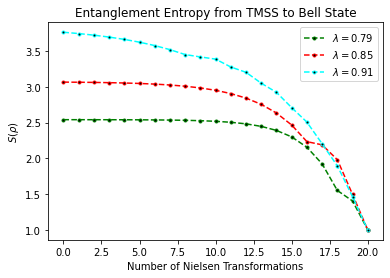

S(r1) 2.540821441283904
S(r2) 3.070349482002992
S(r3) 3.8512668595991304
S(r4) 5.4798958849276005


In [12]:
# Plot the entanglement entropy S(p) of the quantum transition from |Tn...T2T1B> --> |B>, for some upper cutoff n.

def entanglement_entropy_sequence(N, lamb):  #get the entanglement entropy sequence from |TN...T2T1B> --> |B>. x is majorized by y 
  R = generateTMSSvector(math.atanh(lamb), N)
  B = generateBellstate_reduced(N+1)    #generate one larger so that last t-transform is captured
  entanglement_entropy_list = [1] #Bell State

  for i in range(1, N+1):   #N times
    t, k, B_new = single_t_transform(R, B, checkLength=False)
    entanglement_entropy_list += [entanglement_entropy_schmidt_form(B_new)]
    B = B_new

    if (i==N+1):
      entanglement_entropy_list[-1] += entanglement_entropy_schmidt_form(y_new[-1])   #correcting the N+1th term that was incorrectly added

  return list(reversed(entanglement_entropy_list))  #reverse because we want to plot from |Tn...T2T1B> --> |B> in that order


# TEST CODE:
lamb1 = 0.79
lamb2 = 0.85
lamb3 = 0.91
lamb4 = 0.97
N = 20
R = generateTMSSvector(math.atanh(lamb1), N)
B = generateBellstate_reduced(N+1)    #generate one larger so that last t-transform is captured
print(R)
print(B)
S_rho1 = entanglement_entropy_sequence(N, lamb1)
print(S_rho1)
S_rho2 = entanglement_entropy_sequence(N, lamb2)
print(S_rho2)
S_rho3 = entanglement_entropy_sequence(N, lamb3)
print(S_rho3)
# S_rho4 = entanglement_entropy_sequence(N, lamb4)
# print(S_rho4)

# Plot:

plt.plot(S_rho1, color='green', linestyle='dashed', marker='o',
     markerfacecolor='black', markersize=3, label = r"$\lambda = $" + str(lamb1))
plt.plot(S_rho2, color='red', linestyle='dashed', marker='o',
     markerfacecolor='black', markersize=3, label = r"$\lambda = $" + str(lamb2))
plt.plot(S_rho3, color='cyan', linestyle='dashed', marker='o',
     markerfacecolor='black', markersize=3, label = r"$\lambda = $" + str(lamb3))
# plt.plot(S_rho4, color='magenta', linestyle='dashed', marker='o',
#      markerfacecolor='black', markersize=3, label = r"$\lambda = $" + str(lamb4))
plt.title("Entanglement Entropy from TMSS to Bell State")
plt.xlabel('Number of Nielsen Transformations')
plt.ylabel(r'$S(\rho)$')
plt.legend()
plt.show()

r1 = math.atanh(lamb1)
r2 = math.atanh(lamb2)
r3 = math.atanh(lamb3)
r4 = math.atanh(lamb4)
print("S(r1)", (math.cosh(r1))**2 * math.log2((math.cosh(r1))**2) - (math.sinh(r1))**2 * math.log2((math.sinh(r1))**2))
print("S(r2)", (math.cosh(r2))**2 * math.log2((math.cosh(r2))**2) - (math.sinh(r2))**2 * math.log2((math.sinh(r2))**2))
print("S(r3)", (math.cosh(r3))**2 * math.log2((math.cosh(r3))**2) - (math.sinh(r3))**2 * math.log2((math.sinh(r3))**2))
print("S(r4)", (math.cosh(r4))**2 * math.log2((math.cosh(r4))**2) - (math.sinh(r4))**2 * math.log2((math.sinh(r4))**2))

In [13]:
# Check alternate summation formula:

lamb = .8
n = 1502
N = n-2
accum = 1 #accumulator for summation, starts from 1

for j in range(1,N+1):
  accum += (-1/(lamb**2))**j
  # print(accum)

accum_sum = (1-(-1/lamb**2)**(n-2))/(1+lamb**(-2))  #summation formula
print('accum', accum)
print('accum_sum', accum_sum)
accum == accum_sum  #check if true
print((lamb**2)/(-1+lamb**(-2)))

accum 3.274878379999672e+290
accum_sum -2.0959221631997902e+290
1.1377777777777784


In [14]:
a = [1,2,3,4,5]
b = [None]*len(a)
b = list(reversed(a))
b

[5, 4, 3, 2, 1]

In [15]:
x_copy = [6,4,2]
y_copy = [6,4,1]
primary_index = 0 #first mismatching term, i.e. B^n_1 (y[0]) used in the T-transformation
brk=0 #break condition, 0==don't break, 1==break (in loop)
i = 0
while brk == 0:
   if (y_copy[-1] == x_copy[-1]): #if sorted and last elements are equal then no need to transform anymore, so set primary index to -1 (nonsense)
     primary_index = -1
     brk = 1 
   if (brk==0):
    if (y_copy[i] != x_copy[i]):  #check which index is mismatching and that is the first index to transform
      primary_index = i
      brk = 1
    i+=1
   
primary_index

2

In [16]:
x = [1,2,3]
y = [1,2,3,4]
j = len(x)
# x[j]
y[0:-1]

[1, 2, 3]

In [17]:
entanglement_entropy_schmidt_form(generateTMSSvector(math.atanh(0.8), 100))

2.61856441459859

In [18]:
for i in range(1, 10+1):
  print(i)

1
2
3
4
5
6
7
8
9
10


In [19]:
import math
lamb = 0.75
N = 2
a_plus = lamb**(2*N)
a_minus = 1-a_plus
b_plus = lamb**(-2) * (1+(-1/lamb**2)**(N-1)) * (1+1/lamb**2)**(-1) + (1/2)*lamb**(-2*N)*(-1)**(N+1)
b_minus = 1-b_plus
sin_gamma = 2*math.sqrt(a_plus * a_minus)
# Delta = (1/2)*math.asin( math.sqrt((b_plus*b_minus)/(a_plus*a_minus)) )
print("a_plus:", a_plus)
print("a_minus:", a_minus)
print("b_plus:", b_plus)
print("b_minus:", b_minus)
print("sin_gamma:", sin_gamma)
# print("sqrt(bpbm/apam):", math.sqrt((b_plus*b_minus)/(a_plus*a_minus)))
# print("Delta:", Delta)

a_plus: 0.31640625
a_minus: 0.68359375
b_plus: -2.0780246913580243
b_minus: 3.0780246913580243
sin_gamma: 0.9301469452961452


In [20]:
L = 0.86
N = 3
bn_np1 = L**(2*N-2) * (1 - (-1/L**2)**(N-1)) * (1 + 1/L**2)**(-1) + 0.5 * (-1)**(N+1)
bn_np2 = L**(2*N) * (1 - (-1/L**2)**(N)) * (1 + 1/L**2)**(-1) + 0.5 * (-1)**(N+2)
denom = L**(2*N)
print("bn_np1: ", bn_np1)
print("bn_np2: ", bn_np2)
print("bn_np1 + bn_np2: ", denom)
print("b+: ", bn_np1/denom)

bn_np1:  0.30740816
bn_np2:  0.09715907513600008
bn_np1 + bn_np2:  0.40456723513599996
b+:  0.7598444295585657


In [21]:
def find_N_for_lambda(lamb):  #Finds the N for which the index transitions from hopping to NN (i.e. if lambda fails the B^n inequalities, we want n)
  r = atanh(lamb) #lambda = tanh(r), in this case lamb>=0.71 (r>=0.88) for majorization condition
  N = 100 #initialize a 100 length array for computation
  n = 0 #initialize transition index
  pseudoTMSND = generateTMSSvector(r, N, renormalize=False)
  BellN_1 = generateBellstate_reduced(N+1)  #generate one larger than pseudoTMSND so that the last k-index is found (artefact of the code)
  tparamsN, indicesN = t_parameters(pseudoTMSND,BellN_1, checkMajorization=False, checkLength=False)

  for i in range(0, len(indicesN)):
    if (indicesN[i]==2 and indicesN[i-1]==3):
      n = i
  return n

# Test code:
print(find_N_for_lambda(0.76))
print(find_N_for_lambda(0.802))
print(find_N_for_lambda(0.86))
print(find_N_for_lambda(0.8827))
print(find_N_for_lambda(0.95))



1
1
3
7
27


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.7/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


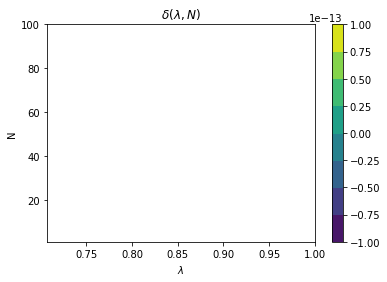

In [22]:
# Plot delta (measurement strength parameter) for transition case as a function of lambda (all others are strong, delta = 0):
import numpy as np
import matplotlib.pyplot as plt
import math

lamb_list = np.linspace(1/np.sqrt(2), 1.0, 100)
n_list = np.linspace(1, 100, 100)

# initializing list
lst = [i for i in range (0,100)]
# converting list to array
arr = np.array(lst)

# print(type(lamb_list))
L, N = np.meshgrid(lamb_list, n_list)
# print(L,N)
a_plus = L**(2*N)
a_minus = 1-a_plus
b_plus = L**(-2) * (1+(-1/L**2)**(N-1)) * (1+1/L**2)**(-1) + L**(-2*N)*(-1)**(N+1)*(1/2)
b_minus = 1-b_plus
sin_gamma = 2*np.sqrt(a_plus * a_minus)


Delta = (1/2)*np.arcsin( np.sqrt((b_plus*b_minus)/(a_plus*a_minus)) )

# Plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(L, N, Delta)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(r'$\delta(\lambda, N)$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('N')
plt.show()



# xlist = np.linspace(-3.0, 3.0, 100)
# ylist = np.linspace(-3.0, 3.0, 100)
# X, Y = np.meshgrid(xlist, ylist)
# Z = np.sqrt(X**2 + Y**2)
# fig,ax=plt.subplots(1,1)
# cp = ax.contourf(X, Y, Z)
# fig.colorbar(cp) # Add a colorbar to a plot
# ax.set_title('Filled Contours Plot')
# #ax.set_xlabel('x (cm)')
# ax.set_ylabel('y (cm)')
# plt.show()

In [23]:
import math

def RMR_matrix(alpha_plus, beta_plus):    #CHECK THE EXPRESSIONS AGAIN
  alpha_minus = 1-alpha_plus
  beta_minus = 1-beta_plus
  apam = alpha_plus*alpha_minus
  bpbm = beta_plus*beta_minus
  Alice = [[0,0], [0,0]]  #initialize
  Bob = [[0,0], [0,0]]  #initialize

  A_11 = (1/(math.sin(0.5*math.arcsin(math.sqrt(bpbm/apam))))) * (-1 + 2*math.sqrt((alpha_plus - beta_plus)*(alpha_plus - beta_minus)/(apam)) + beta_plus - beta_minus - 2*alpha_plus*(-1 + math.sqrt((alpha_plus - beta_plus)*(alpha_plus - beta_minus)/(apam))))
  A_11 = A_11/(2*math.sqrt(2) * alpha_plus - alpha_minus)

  A_12 = (1/(math.sin(0.5*math.arcsin(math.sqrt(bpbm/apam))))) * (1 + beta_plus - beta_minus + 2*alpha_plus*(-1 + math.sqrt((alpha_plus - beta_plus)*(alpha_plus - beta_minus)/(apam))))
  A_12 = A_12/(2*math.sqrt(2) * alpha_plus - alpha_minus)

  A_21 = (1/(math.sin(0.5*math.arcsin(math.sqrt(bpbm/apam))))) * (1 - 2*math.sqrt((alpha_plus - beta_plus)*(alpha_plus - beta_minus)/(apam)) + beta_plus - beta_minus - 2*alpha_plus*(-1 + math.sqrt((alpha_plus - beta_plus)*(alpha_plus - beta_minus)/(apam))))
  A_21 = -A_21/(2*math.sqrt(2) * alpha_plus - alpha_minus)

  A_22 = (1/(math.sin(0.5*math.arcsin(math.sqrt(bpbm/apam))))) * (-1 + beta_plus - beta_minus - 2*alpha_plus*(-1 + math.sqrt((alpha_plus - beta_plus)*(alpha_plus - beta_minus)/(apam)))) 
  A_22 = -A_22/(2*math.sqrt(2) * alpha_plus - alpha_minus)

  Alice[0,0] = A_11
  Alice[0,1] = A_12
  Alice[1,0] = A_21
  Alice[1,1] = A_22

  B_11 = 2*math.sqrt(1-alpha_plus) + math.sqrt(alpha_plus) * (1+beta_plus - beta_minus)
  B_11 = B_11/(math.sqrt(apam) * (-1 + math.sqrt((alpha_plus - beta_plus)*(alpha_plus - beta_minus)/(apam))))
  B_11 = B_11/(2 * alpha_plus - alpha_minus)

  B_21 = -2*math.sqrt(1-alpha_plus) + math.sqrt(alpha_plus) * (-1+beta_plus - beta_minus)
  B_21 = B_21/(math.sqrt(apam) * (-1 + math.sqrt((alpha_plus - beta_plus)*(alpha_plus - beta_minus)/(apam))))
  B_21 = B_21/(2 * alpha_plus - alpha_minus)

  B_12 = 8*math.sqrt(alpha_minus)*alpha_plus**2 + 4*math.sqrt(alpha_plus)*math.sqrt(apam) - 8*alpha_plus*(math.sqrt(alpha_minus) - 2*(alpha_minus)**1.5 * alpha_plus(1+(beta_plus - beta_minus)*(1+math.sqrt(1-bpbm/apam))))
  B_12 = B_12/(4*math.sqrt(apam)*(alpha_plus - alpha_minus))

  B_22 = 8*math.sqrt(alpha_minus)*alpha_plus**2 + 4*math.sqrt(alpha_plus)*math.sqrt(apam) - 8*alpha_plus*(math.sqrt(alpha_minus) - 2*(alpha_minus)**1.5 * alpha_plus(1+(beta_plus - beta_minus)*(1+math.sqrt(1-bpbm/apam))))
  B_22 = B_12/(4*math.sqrt(apam)*(alpha_plus - alpha_minus))

  Bob[0,0] = B_11
  Bob[0,1] = B_12
  Bob[1,0] = B_21
  Bob[1,1] = B_22

  return Alice, Bob


k, n, lamb: 2 0 0.76
k, n, lamb: 2 1 0.761105527638191
k, n, lamb: 2 2 0.7622110552763819
k, n, lamb: 2 3 0.7633165829145728
k, n, lamb: 2 4 0.7644221105527639
k, n, lamb: 2 5 0.7655276381909548
k, n, lamb: 2 6 0.7666331658291458
k, n, lamb: 2 7 0.7677386934673367
k, n, lamb: 2 8 0.7688442211055276
k, n, lamb: 2 9 0.7699497487437186
k, n, lamb: 2 10 0.7710552763819095
k, n, lamb: 2 11 0.7721608040201005
k, n, lamb: 2 12 0.7732663316582915
k, n, lamb: 2 13 0.7743718592964824
k, n, lamb: 2 14 0.7754773869346734
k, n, lamb: 2 15 0.7765829145728643
k, n, lamb: 2 16 0.7776884422110553
k, n, lamb: 2 17 0.7787939698492462
k, n, lamb: 2 18 0.7798994974874371
k, n, lamb: 2 19 0.7810050251256282
k, n, lamb: 2 20 0.7821105527638191
k, n, lamb: 2 21 0.7832160804020101
k, n, lamb: 2 22 0.784321608040201
k, n, lamb: 2 23 0.785427135678392
k, n, lamb: 2 24 0.7865326633165829
k, n, lamb: 2 25 0.7876381909547738
k, n, lamb: 2 26 0.7887437185929649
k, n, lamb: 2 27 0.7898492462311558
k, n, lamb: 2 28 0.

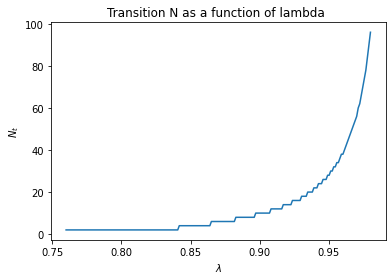

In [24]:
# Plot the transition N as a function of lambda:
import matplotlib.pyplot as plt

def find_Transition_N(lamb):
  # lamb_crit_1 = 2**(-1/4) #first transition lambda ~8408964152537145, anything below this transitions at round 2
  lamb_crit_1 = 0.8408964152537145575472  #refined from manual testing of the code
  r = atanh(lamb) #lambda = tanh(r), in this case lamb>=0.71 (r>=0.88) for majorization condition
  N = 100 #dimension
  Transition_N = 0  #initialize
  pseudoTMSND = generateTMSSvector(r, N, renormalize=False)
  BellN_1 = generateBellstate_reduced(N+1)  #generate one larger than pseudoTMSND so that the last k-index is found (artefact of the code)


  if (lamb<lamb_crit_1):
    Transition_N = 2

  if (lamb>=lamb_crit_1):
    tparamsN, indicesN = t_parameters(pseudoTMSND,BellN_1, checkMajorization=False, checkLength=False, print_vals=False)
    for i in range(0, len(indicesN)):
      if indicesN[i]==2 and indicesN[i-1]==3:
        Transition_N = i+1  #it is one more because that is the first round where k=2
  
  return Transition_N

# Test Code:
# print(find_Transition_N(0.76))  #2
# print(find_Transition_N(0.79))  #2
# print(find_Transition_N(0.82))  #2
# print(find_Transition_N(0.85))  #4
# print(find_Transition_N(0.88))  #6
# print(find_Transition_N(0.91))  #12
# print(find_Transition_N(0.94))  #22
# print(find_Transition_N(0.97))  #56
# print(find_Transition_N(0.98))  #96
# print(find_Transition_N(0.99))  #too big (>100)

# Plot transition N:
lamb_min = 0.76 #2**(-1/2)
upper_lamb = 0.98 #0.98
N = 200
lamb_list = np.linspace(lamb_min, upper_lamb, N)
# lamb_list = np.array([0.78, 0.9, 0.96])
# print(lamb_list)
# print(find_Transition_N(lamb_list[1]))
# n_list = [0]*len(lamb_list)
n_list = []
for i in range(0, len(lamb_list)):
  # n_list[i] = find_Transition_N(lamb_list[i])
  n_list.append(find_Transition_N(lamb_list[i]))
  print('k, n, lamb:', n_list[i], i, lamb_list[i])
N_List = np.array(n_list)

# plt.plot(N_List, lamb_list) #matches contour plot axes layout
plt.plot(lamb_list, N_List) #traditional layout
plt.ylabel(r"$N_t$")
plt.xlabel(r"$\lambda$")
plt.locator_params(axis="y", integer=True, tight=True)
plt.title("Transition N as a function of lambda ")
plt.show()

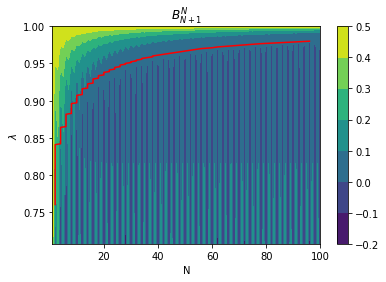

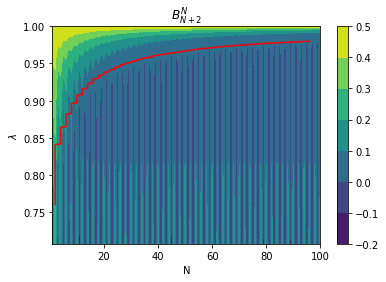

In [25]:
# Contour plot for checking if Bn coefficients in Hop are >0
import numpy as np
import matplotlib.pyplot as plt
# xlist = np.linspace(-3.0, 3.0, 100)
# ylist = np.linspace(-3.0, 3.0, 100)
# X, Y = np.meshgrid(xlist, ylist)
# Z = np.sqrt(X**2 + Y**2)
# fig,ax=plt.subplots(1,1)
# cp = ax.contourf(X, Y, Z)
# fig.colorbar(cp) # Add a colorbar to a plot
# ax.set_title('Filled Contours Plot')
# #ax.set_xlabel('x (cm)')
# ax.set_ylabel('y (cm)')
# plt.show()


upper_N = 100
nlist = np.linspace(1,upper_N,100)
lamb_min = 2**(-1/2)
lamblist = np.linspace(lamb_min, 1, 100)
N, L = np.meshgrid(nlist, lamblist)
B_n_np1 = L**(2*N-2) * (1-(-1/L**2)**(N-1)) * (1+1/L**2)**(-1) + (-1)**(N+1) * (1/2)
B_n_np2 = L**(2*N) * (1-(-1/L**2)**(N)) * (1+1/L**2)**(-1) + (-1)**(N+2) * (1/2)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(N, L, B_n_np1)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(N_List, lamb_list, 'r')  #add the transition N line
ax.set_title(r'$B^N_{N+1}$')
ax.set_xlabel(r'N')
ax.set_ylabel(r'$\lambda$')
plt.show()

fig,ax=plt.subplots(1,1)
cp = ax.contourf(N, L, B_n_np2)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(N_List, lamb_list, 'r')  #add the transition N line
ax.set_title(r'$B^N_{N+2}$')
ax.set_xlabel(r'N')
ax.set_ylabel(r'$\lambda$')
plt.show()

In [26]:
2**(-1/2) #lamb_min

0.7071067811865476

In [27]:
# lamb_list = np.linspace(lamb_min, 0.98, N)
# for element in lamb_list:
#   print(element)
# J=5
# print(find_Transition_N(lamb_list[J]), lamb_list[J])
# print(find_Transition_N(0.7861))  #test which lambda it fails at, add an if to the code (below 0.84 is k=2 anyways) 
print(find_Transition_N(2**(-1/4))) #lambda = 0.8408964152537145
# print(find_Transition_N(0.8408964152537145575472))
print(find_Transition_N(0.8409))
print(find_Transition_N(0.96))

2
4
38


In [28]:
pip install SciencePlots

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for SciencePlots: filename=SciencePlots-1.0.9-py3-none-any.whl size=6484 sha256=efb6213453881bb95dbde260f0acf37268bdc0c1202cdbf2d592913cea4eeb63
  Stored in directory: /root/.cache/pip/wheels/37/f8/e9/b2f53a40b336388dfc57b108150daff7d6ffbbfc618dba3924
Successfully built SciencePlots


In [29]:
plt.style.reload_library()
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'sans',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

[0.8408967485417043, 0.8641120068187474, 0.8825570439287198, 0.8967148856991795, 0.9077207792728617, 0.9164725523179396, 0.9235842207169022, 0.9294787731887975, 0.9344509373572202, 0.9386999272640447, 0.9423785646400238, 0.9455987368237444, 0.9484423125995383, 0.9509720580353934, 0.9532398233613865, 0.9552865429696834, 0.9571422354145394, 0.9588369192502093, 0.9603869682335595, 0.9618114850809342, 0.9631295725086775, 0.9643466884357447, 0.9654792066190023, 0.9665353139368835, 0.9675231972678215, 0.9684455855712941, 0.9693133946852119, 0.970129353569053, 0.9708989201417728, 0.9716275523223264, 0.9723152501107142, 0.9729674714258916, 0.9735842162678583, 0.974173671515048, 0.9747331082079824, 0.9752679842656173, 0.9757782996879527, 0.9762640544749885, 0.9767307065456803, 0.9771755269405502, 0.9776039735785537, 0.978013317500213, 0.978406287665006, 0.9787856130324104, 0.9791512936024261, 0.9795006004155755, 0.9798389913908139]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

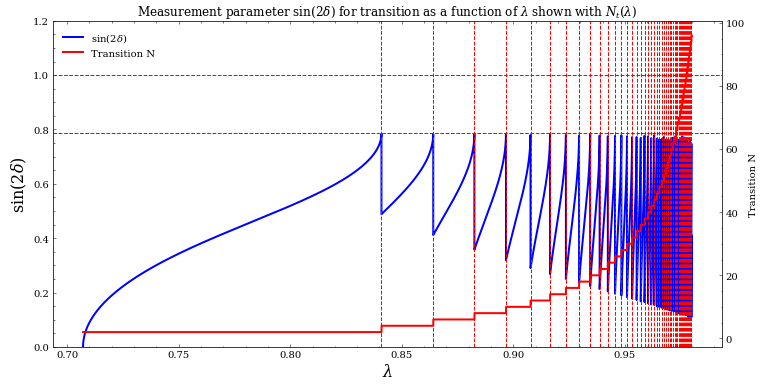

In [69]:
# Plot delta (measurement strength parameter) for the transition step as a function of lambda:
# 1) Write lambda
# 2) Find the transition N (N_t)
# 3) Write beta_pm, alpha_pm - functions of lambda and N_t
# 4) Write down delta(beta_pm, alpha_pm) and plot

import matplotlib.pyplot as plt
plt.style.use(['science','no-latex'])  #changes plotting style to look nicer

delta_around_center = 0.001 #check a lambda +/- delta
lambda_mid = 0.8967 #2**(-1/4)   #center lambda which to check around
# lamb_min = lambda_mid-delta_around_center 
# upper_lamb = lambda_mid+delta_around_center 
lamb_min = 2**(-1/2)  #0.83 #2**(-1/2) #0.97 #0.95
upper_lamb = 0.98 #0.85 #0.98 #1
Sampling_N = 5  #power of 10 for linspace sampling density
Lamblist = np.linspace(lamb_min, upper_lamb, 10**Sampling_N)
# print(Lamblist)
n_list = []
for i in range(0, len(Lamblist)):
  n_list.append(find_Transition_N(Lamblist[i]))
  # print('k, n, lamb:', n_list[i], i, Lamblist[i])
N_List = np.array(n_list)
# print(N_List)

beta_p_beta_m_list = [] #beta_plus * beta_minus
alpha_p_alpha_m_list = [] #alpha_plus * alpha_minus
bpbm_apam_list = []
delta_list = []
cosdelta_list = []
sin2delta_list = []
Nt_list = []
for j in range(0, len(Lamblist)):
  Nt = N_List[j] #transition N
  n_step = Nt-1   #the n at transition = Nt-1, because Nt = n+1 (per my notation)
  Nt_list.append(Nt)
  L = Lamblist[j]
  # print("L, Nt:", L, Nt)
  # beta_p_beta_m_list.append( (1+L**2)**(-2)* (L**2 + (1/(4*L**(4*Nt))) * (2*L**2 -1 -L**4) * (1 + (-1)**(Nt+1) * 2*L**(2*Nt))) )
  # beta_p_beta_m_list.append( (L**2 - ( (1-L**2)**2/(4*L**(4*Nt)) ) *((1 + (-1)**(Nt+1) * 2*L**(2*Nt))) )/(L**4 + 2*L**2 +1)  )
  bpbm_denom = L**4 +2*L**2 +1
  bpbm_term1_inside_brackets = L**2
  bpbm_term2_inside_brackets = (1/(4*L**(4*n_step))) * (-L**4 +2*L**2 -1) * (1 + 2*((-1)**(n_step+1)) * L**(2*n_step))
  beta_p_beta_m_list.append( (1/bpbm_denom) * (bpbm_term1_inside_brackets + bpbm_term2_inside_brackets) )
  # print("bpbm:", beta_p_beta_m_list[j]) 
  alpha_p_alpha_m_list.append(L**2 - L**4)
  # print("apam:", alpha_p_alpha_m_list[j]) 
  bpbm_apam_list.append(beta_p_beta_m_list[j]/alpha_p_alpha_m_list[j])
  # print("bpbm/apam:", beta_p_beta_m_list[j]/alpha_p_alpha_m_list[j]) 
  delta_list.append(0.5 * np.arcsin(np.sqrt(bpbm_apam_list[j])))
  cosdelta_list.append(np.cos(delta_list[j]))
  sin2delta_list.append(np.sqrt(bpbm_apam_list[j])) #sin(2*delta)

# Get lambda where transition happens to draw a vertical line in the plot:
transition_lamb_list = []
for i in range(1, len(Nt_list)):
  N_placeholder = 1 #placeholder to avoid repitition of finding lambdas; used to be = 2
  if ((Nt_list[i] != Nt_list[i-1]) and Nt_list[i]!=N_placeholder):
    transition_lamb_list.append(Lamblist[i])
    N_placeholder = Nt_list[i]

print(transition_lamb_list)
print(Nt_list)

# Plot
fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(Lamblist, sin2delta_list, 'b', label=r"$\sin(2\delta)$", linewidth=2)  #sin2delta_list
ax2 = axes.twinx()  #Nt axis
ax2.plot(Lamblist, Nt_list, 'r-', label="Transition N", linewidth=2)
ax2.set_ylabel("Transition N")
axes.set_ylim(0,1.2)
axes.set_ylabel(r"$\sin(2\delta)$", fontsize=16)
axes.set_xlabel(r"$\lambda$", fontsize=16)
# axes.legend(loc='best')
# ax2.legend(loc='best')
axes.axhline(y=1, c='g', ls = "--")
# axes.axhline(y=np.pi/4, c='g', ls = "--") #plot if delta_list is udea
for i in range(0, len(transition_lamb_list)):
  axes.axvline(x=transition_lamb_list[i], c='r', ls = "--")
fig.legend(loc="upper left", bbox_to_anchor=(0,1.5), bbox_transform=ax.transAxes)
axes.set_title(r"Measurement parameter $\sin(2\delta)$ for transition as a function of $\lambda$ shown with $N_t(\lambda)$") 
plt.show()

# for i in range(0, len(sin2delta_list)):
#   print("lambda, sin(delta):", Lamblist[i], sin2delta_list[i], '\n')
# N_List 
# Nt_list

In [31]:
# sin(2delta) function:

def sin_2delta(lamb):

  n_step = find_Transition_N(lamb)-1  #Nt-1
  L = lamb

  bpbm_denom = L**4 +2*L**2 +1
  bpbm_term1_inside_brackets = L**2
  bpbm_term2_inside_brackets = (1/(4*L**(4*n_step))) * (-L**4 +2*L**2 -1) * (1 + 2*((-1)**(n_step+1)) * L**(2*n_step))
  beta_p_beta_m = ( (1/bpbm_denom) * (bpbm_term1_inside_brackets + bpbm_term2_inside_brackets) )

  alpha_p_alpha_m = (L**2 - L**4)

  bpbm_apam = (beta_p_beta_m/alpha_p_alpha_m)

  sin2delta = (np.sqrt(bpbm_apam)) #sin(2*delta)


  return sin2delta


  # Test Code:

sin_2delta(0.85)

0.9030064817182014

[0.9998779222360098, 0.9921567416492215, 0.9921567416492215, 0.9921567416492215, 0.9921567416492215, 0.9921567416492215, 0.9921567416492215, 0.9921567416492215, 0.9921567416492215, 0.9921567416492215, 0.9921567416492215]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


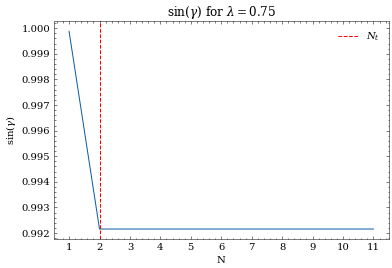

In [32]:
%matplotlib inline 
from matplotlib.ticker import MaxNLocator
# Plot sin(gamma) for the Hop, transition, and NN in one plot:
# 1) Write lambda
# 2) Find the transition N (N_t)
# 3) From N=1 to N = Nt-1, sin(gamma) is Hop expression
# 4) N=Nt and onwards use the Transition/NN expression. Plot a few rounds of NN (since it's constant)

# Write lambda, find Nt
lamb_pick = 0.75 #pick a lambda
Nt_lambpick = find_Transition_N(lamb_pick)

# Fill sin(gamma) list
sin_gamma_list = [] #sin(gamma) list
N_list = []
for N in range(1, Nt_lambpick+10): #show 10 more rounds than Nt of sin(gamma)
  N_list.append(N)

  if (N < Nt_lambpick): #hop
    R_n_1 = lamb_pick**(2*N) * (1-lamb_pick**2) #R_n+1
    B_np1_np2 = lamb_pick**(2*N+2) * (1-(-1/lamb_pick**2)**(N+1)) * (1+(1/lamb_pick**2))**(-1) + 0.5*(-1)**(N+1)
    alpha_plus = R_n_1/(R_n_1 + B_np1_np2)
    alpha_minus = 1-alpha_plus
    # print(alpha_plus, alpha_minus)
    sin_gamma_list.append(2*sqrt(alpha_plus*alpha_minus))

    numerator = 2*(1-lamb_pick**2) * ( 2*(1+lamb_pick**2)*lamb_pick**(4*N+4) + (-1)**N * (lamb_pick**4 - lamb_pick**(2*N)) )
    denominator =  (1-lamb_pick**2)* (4*(-1)**(N+1) * lamb_pick**(2*N) + 1 - lamb_pick**2 ) + 4*lamb_pick**(4*N)
    # print(numerator/denominator)
    # sin_gamma_list.append(2*sqrt(numerator/denominator))

  if (N >= Nt_lambpick): #Transition/NN
    sin_gamma_list.append( 2*sqrt(lamb_pick**2 - lamb_pick**4) )

print(sin_gamma_list)
print(N_list)

# Plot
plt.plot(N_list, sin_gamma_list) #delta_list
plt.rcParams['figure.figsize'] = [20, 10]  #width by height in inches,[15, 7]
plt.axvline(x=Nt_lambpick, label=r'$N_t$', c='r', ls = "--")
plt.title(r"$\sin(\gamma)$ for $\lambda =$" + str(lamb_pick))
plt.xlabel(r"N")
plt.ylabel(r"$\sin(\gamma)$")  #\delta(\lambda)
new_list = range(math.floor(min(N_list)), math.ceil(max(N_list))+1)
# new_list = [1,2, 0, 0]  show only Nt (incomplete)
plt.xticks(new_list)
# ax.xaxis.set_major_locator(MaxNLocator(nbins=100,integer=True))
plt.legend(loc = 'best')
plt.show()

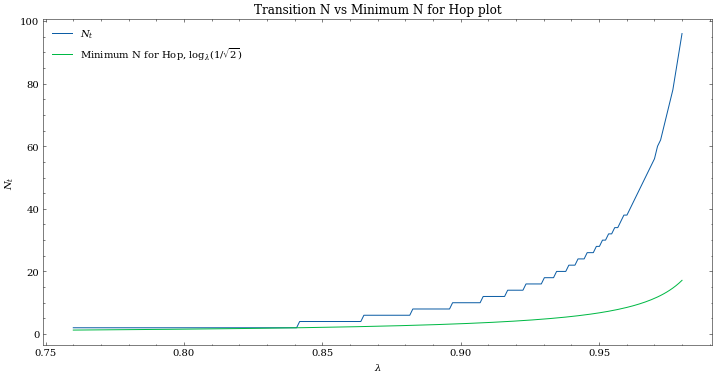

In [33]:
# Show that Nt is in increments of 2, plot n(lambda) and Nt(lambda)

# Plot the transition N as a function of lambda:
import matplotlib.pyplot as plt
import math
from numpy import diff

# Plot transition N:
lamb_min = 0.76 #2**(-1/2)
upper_lamb = 0.98 #0.98
N = 200
lamb_list = np.linspace(lamb_min, upper_lamb, N)
n_list = []
Nt_derivative_list = []
n_lambda_list = []
n_lamb_list_derivative_list = []
for i in range(0, len(lamb_list)):
  # n_list[i] = find_Transition_N(lamb_list[i])
  n_list.append(find_Transition_N(lamb_list[i]))
  n_lambda_list.append(math.log(1/sqrt(2), lamb_list[i]))
  n_lamb_list_derivative_list.append( (math.log(sqrt(2), lamb_list[i])) / (lamb_list[i] * math.log(lamb_list[i]))  )
  # print('k, n, lamb:', n_list[i], i, lamb_list[i]) 
N_List = np.array(n_list)
Nt_derivative_list = diff(n_lambda_list)/diff(lamb_list)

fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(lamb_list, N_List, label = r'$N_t$') #Nt(lambda)
# axes.plot(lamb_list[0:-1], Nt_derivative_list, label = r'Numerical Derivative of Nt') #Nt'(lambda)
axes.plot(lamb_list, n_lambda_list, label = r'Minimum N for Hop, $\log_{\lambda}(1/\sqrt{2})$') #n(lambda)
# axes.plot(lamb_list, n_lamb_list_derivative_list, label = r'Derivative of Minimum N') #n'(lambda)
axes.set_ylabel(r"$N_t$")
axes.set_xlabel(r"$\lambda$")
axes.locator_params(axis="y", integer=True, tight=True)
axes.set_title("Transition N vs Minimum N for Hop plot")
axes.legend(loc=0)
plt.show()

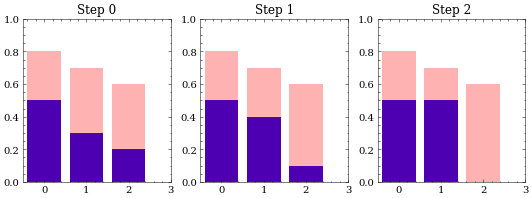

In [34]:
# Bar graph test code for Fock state distribution
tst = [0.5, 0.3, 0.2]
tst2 = [0.5, 0.4, 0.1]
tst3 = [0.5, 0.5, 0]
R_tst = [0.8, .7, 0.6]

tst_list = [tst, tst2, tst3]
N=len(tst)


fig, axes = plt.subplots(nrows = 1, ncols = N, figsize=(3*len(tst), 3))

for idx, lst in enumerate(tst_list):

    # plot its fock-state distribution
    axes[idx].bar(np.arange(0, N), lst, color="blue", alpha=1, label = 'B')
    axes[idx].bar(np.arange(0, N), R_tst, color="red", alpha=0.3, label = 'R')
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xlim(-0.5, N)
    axes[idx].set_title("Step "+ str(idx))
fig.show()

pseudoTMS5D->Bell: t_parameters [0.875, 0.41964285714285715, 0.43750000000000006] 

pseudoTMS5D->Bell: Index choice: [3, 2, 2]
pseudoTMS5D->Bell: y_vec_list_4: [[0.5, 0.5, 0, 0, 0], [0.4375, 0.5, 0.0625, 0, 0], [0.4375, 0.24609375, 0.31640624999999994, 0, 0], [0.4375, 0.24609375, 0.138427734375, 0.17797851562499997, 0]]
TMSS sequence:  [0.4375, 0.24609375, 0.138427734375, 0.0778656005859375]


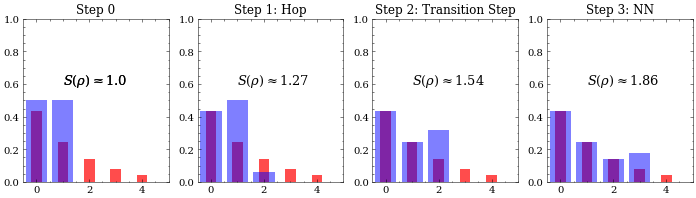

In [70]:
def t_parameters_2(x, y, checkMajorization = False, checkLength = True, print_vals = False): # x majorized by y; finds t-parameters such that x = Dy, D = T_r...T_2 T_1
  # First sort vectors into descending order
  x_copy =  bubbleSort(x) 
  y_copy = bubbleSort(y)
  lamb = np.sqrt(1-x_copy[0])
  N = len(x)
  t_parameters_list = []
  index_choice_list = []  #which index is chosen at each reduced vector step
  y_vec_list = []   #stores a list of the transformed vectors from each step
  y_vec_list.append(generateTMSSvector(atanh(lamb), N)[0:0] + y_copy) 
  if (print_vals==True):
    print(y_vec_list)

  if (checkLength ==True):
    if (len(x)!= len(y)):
      print("Unequal lengths \n")
      return False  #or break?
  if (checkMajorization==True):
    if (isMajorized(x,y)==False):
      print("Not majorized \n")
      return t_parameters_list, index_choice_list  #or break?

  # y_n <= x_1 <= y_1 and y_k <= x_1 <= y_{k-1}
  # Therefore x_1 = t*y_1 + (1-t)*y_k
  # Therefore t = (x_1-y_k)/(y_1-y_k)
  i=0
  k=0
  t=0
  while i < len(x)-1: #iterate appropriate amount of times (1 less than dimension of x,y)
    if (print_vals==True):
      print('x', x_copy)
      print('y', y_copy)
    k = find_k_idx(x_copy, y_copy)  #Find appropriate k index
    if (print_vals==True):
      print('k', k+1)
    index_choice_list.append(k+1) #append index choice; k+1 because Python starts from 0
    t = (x_copy[0]-y_copy[k])/(y_copy[0]-y_copy[k]) #Write down t
    t_parameters_list.append(t)  #Append t to list
    old_yk = y_copy[k]
    y_copy[k] = t*y_copy[k] + (1-t)*y_copy[0] #Change k-th index entry according to T-transform
    y_copy[0] = t*y_copy[0] + (1-t)*old_yk #Change 0-th index entry according to T-transform
    if (print_vals==True):
      print('x_after', x_copy)
      print('y_after', y_copy)
    y_copy = y_copy[1:] # Pop the first index to get reduced vector
    x_copy = x_copy[1:] # Pop the first index to get reduced vector
    i+=1
    y_vec_list.append(generateTMSSvector(atanh(lamb), N)[0:i] + y_copy)   #generates the full-length transformed vector after the step performed in the loop
    if (print_vals==True):
      print(y_vec_list)

    if (t>1 or t<0):  #out of bounds t condition
      print("Incorrect t obtained \n")
      return False  #or break?

  return t_parameters_list, index_choice_list, y_vec_list


# Test Code:

# 5D pseudo-TMS->Bell state case:
lamb =  0.75 #2**(-1/4) + 0.01  #lambda = tanh(r), in this case lamb>=0.72 for majorization condition
N_dim = find_Transition_N(lamb) + 2
# N = 1 + lamb**2 + lamb**4 + lamb**6 + lamb**8 #normalization
# pseudoTMS5D = [1/N, lamb**2/N, lamb**4/N, lamb**6/N, lamb**8/N]
pseudoTMSND = generateTMSSvector(atanh(lamb), N_dim)
# Bell = [1/2, 1/2, 0, 0, 0]
Bell = generateBellstate_reduced(N_dim + 1)
tparams4, indices4, y_vec_list_4 = t_parameters_2(pseudoTMSND, Bell, checkMajorization=False, checkLength=False)
print('pseudoTMS5D->Bell: t_parameters', tparams4, '\n') #[0.927214719760047, 0.4840011596679688, 0.5322245322245323, 0.6400000000000001] 
print('pseudoTMS5D->Bell: Index choice:',indices4)
print('pseudoTMS5D->Bell: y_vec_list_4:', y_vec_list_4)
print('TMSS sequence: ', pseudoTMSND)


# Plot the Fock state distribution

N=len(y_vec_list_4)
pseudoTMSND_1 = generateTMSSvector(atanh(lamb), N_dim+1)  #generate R-vector for plotting in background
width_bar = 0.8 #width of bars in plot

fig, axes = plt.subplots(nrows = 1, ncols = N, figsize=(3*len(y_vec_list_4), 3))
entanglement_entropy_lst = [] #stores entanglement entropy at each step of the transformation

for idx, lst in enumerate(y_vec_list_4):
    N_transition = find_Transition_N(lamb)
    # plot R-vector:
    axes[idx].bar(np.arange(0, N+1), pseudoTMSND_1, width=0.5*width_bar, color="r", alpha=0.7, label = 'R')
    # plot its fock-state distribution:
    axes[idx].bar(np.arange(0, N+1), lst, width=width_bar, color="b", alpha=.5, label = 'B')
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xlim(-0.5, N+1)
    entanglement_entropy_lst.append(entanglement_entropy_schmidt_form(lst))
    axes[idx].text(1, 0.6, r"$S(\rho) \approx$" + str(round(entanglement_entropy_schmidt_form(lst), 2)), fontsize = 13)
    # axes[idx].set_title("Step "+ str(idx))

    if idx == 0:
      axes[idx].set_title("Step "+ str(idx))
      axes[idx].text(1, 0.6, r"$S(\rho) =$" + str(round(entanglement_entropy_schmidt_form(lst), 2)), fontsize = 13) #in classical case the Bell state entanglement entropy = 1 exactly 
    if idx > N_transition:
      axes[idx].set_title("Step "+ str(idx)+ ": NN")
    if idx < N_transition and idx > 0:
      axes[idx].set_title("Step "+ str(idx)+ ": Hop")
    if idx == N_transition:
      axes[idx].set_title("Step "+ str(idx)+ ": Transition Step")
fig.show()
# 

S(r) 2.2598843618022784


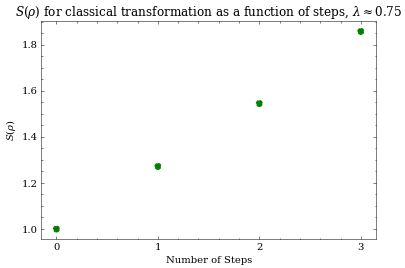

In [73]:
# Plot the entanglement entropy as a scatter plot 
%matplotlib inline
fig1, axes1 = plt.subplots(1,1)
axes1.scatter(np.arange(0, N), entanglement_entropy_lst, color='green', linestyle='dashed', marker='o')
axes1.set_xticks(range(0,N))
axes1.set_xlabel("Number of Steps")
axes1.set_ylabel(r"$S(\rho)$")
axes1.set_title(r"$S(\rho)$ for classical transformation as a function of steps, $\lambda \approx $" + str(round(lamb, 4)))
fig1.show()

# Total entanglement entropy after infinite classical transformations:
r = math.atanh(lamb)
print("S(r)", (math.cosh(r))**2 * math.log2((math.cosh(r))**2) - (math.sinh(r))**2 * math.log2((math.sinh(r))**2))

In [37]:
y_vec_list = [[0.5,0.5,0,0,0]]
y_vec_list.append(yy)
y_vec_list[0]=yy
y_vec_list

[[60, 30, 5, 5], [60, 30, 5, 5]]

In [38]:
yy = [1,2,3]
yy = yy[1:]
blah_lst = [yy, a]
a=generateTMSSvector(0.9, 5)[0:1]
a+yy
blah_lst.append(a+yy)
blah_lst


[[2, 3], [1, 2, 3, 4, 5], [0.4869173611483415, 2, 3]]

In [39]:
find_Transition_N(2**(-1/4)+0.001)

4

## Quantum Protocol:
Logic:
Given a $\lambda$, $n_{cutoff}$, we can transform the truncated TMSS as follows:

1.   Find the transition step classically, i.e. find $N_t$
2.   Write the truncated TMSS sequence (up till $n_{cutoff}$)
3.   Three cases for transformation (total $n_{cutoff}$ number of steps):
  *   NN $\rightarrow$ NN/Transition ($n_{cutoff} - N_t$ steps): <br>
  $\delta=0$. Identify $\alpha_{\pm}$ and replace with $\lambda_{\pm} (\delta, \gamma)$. Store transformed vector.
  *   Transition $\rightarrow$ Hop (1 step): <br>
  Get $\delta$ from graph, get $\gamma$ from graph. Identify $\alpha_{\pm}$ and replace with $\lambda_{\pm} (\delta, \gamma)$. Store transformed vector.
  *  Hop $\rightarrow$ Hop ($N_t - 1$ steps): <br>
  $\delta=0$. Identify $\alpha_{\pm}$ and replace with $\lambda_{\pm} (\delta, \gamma)$. Store transformed vector. <br>
Note that for the first and third case, $\gamma$ isn't required because $\delta=0$.
4.   After transforming $n_{cutoff}$ number of times, we are done. Can now:

  *   Plot entanglement entropy, compare to classical case
  *   Bar graph of Schmidt coefficients
  *   Convergence of $S(\rho)$ for different $n_{cutoff}$
  *   Fail probability as a function of $n_{cutoff}$

In [40]:
def quantum_protocol(LAMB, n_cutoff): #transforms |r, n_cutoff> (truncated TMSS) for n_cutoff number of times (towards the Bell state)

  N_t = find_Transition_N(LAMB)
  truncated_TMSS = generateTMSSvector(atanh(LAMB), n_cutoff+1)  #need 1 more because to go backwards one more term is required
  # N = n_cutoff  #counter in loop
  k_pointer = n_cutoff  #points to element to transform; counter ranges from 1 to n_cutoff

  transformed_vector = []       #initiate empty list to store transformed vector at each step
  transformed_TMSS_list = []    #list of transformed vectors at each step 
  transformed_TMSS_list.append(truncated_TMSS[:])  #add the initial truncated TMSS list
  print("TMSS list:", transformed_TMSS_list)

  # if (n_cutoff <= N_t):   # skipping transition step, change later if not a problem
  #   return -1

  # Number of steps to transform:
  # if (n_cutoff<N_t):
  #   N_steps = n_cutoff  #only Hop
  # if (n_cutoff>N_t):
  #   N_steps = n_cutoff-N_t	#Old case, all 3 (NN, Transition, Hop)
  # if (n_cutoff=N_t):
  #   N_steps = n_cutoff  #one transition, rest Hop

  N_hop_steps = 0 #number of times to perform hop-->hop transformation

  if (N_t > n_cutoff):
    N_hop_steps = n_cutoff
    truncated_TMSS = generateTMSSvector(atanh(LAMB), n_cutoff+2)  #need 2 more for NC<Nt, because hop transform is applied to |n+2, n+2>, |nn> terms
  if (N_t < n_cutoff):
    N_hop_steps = N_t-1

  #Transform n_cutoff number of times:
  transformed_vector = truncated_TMSS

  if ((n_cutoff-N_t)>=0):  
    for i in range(1, n_cutoff-N_t+1):  #NN-->NN/Transition, n_cutoff-N_t steps 
      # print('i, NN to NN/Transition:',i)
      print('k_ptr:', k_pointer)
      cos_squared_zeta = transformed_vector[k_pointer ] + transformed_vector[k_pointer-1 ]  #|n+1, n+1>, |nn> coefficients respectively
      transformed_vector[k_pointer-1 ] = cos_squared_zeta
      transformed_vector[k_pointer ] = 0
      transformed_TMSS_list.append(transformed_vector[:])
      k_pointer = k_pointer-1
      # print(transformed_TMSS_list)
  
    for j in range(1,1+1):              #Transition-->Hop, 1 step
      # print('j, Transition to Hop:', i+j)
      print('k_ptr:', k_pointer)
      cos_squared_zeta = transformed_vector[k_pointer ] + transformed_vector[k_pointer-1 ]  #|n+1, n+1>, |nn> coefficients respectively
      sin_squared_gamma = 4*(LAMB**2 - LAMB**4)   #sin^2(gamma) 
      # sin_squared_gamma = (sin(arccos(2*transformed_vector[k_pointer ] -1)))**2   #sin^2(gamma) 
      sin_squared_2delta = (sin_2delta(LAMB))**2  #sin^2(2delta) 
      # lamb_plus = 0.5 * sqrt(1+sqrt(1-sin_squared_2delta*sin_squared_gamma))  #why is the first sqrt here?
      # lamb_minus = 0.5 * sqrt(1-sqrt(1-sin_squared_2delta*sin_squared_gamma)) #why is the first sqrt here? 
      lamb_plus = 0.5 * (1+sqrt(1-sin_squared_2delta*sin_squared_gamma))
      lamb_minus = 0.5 * (1-sqrt(1-sin_squared_2delta*sin_squared_gamma))
      transformed_vector[k_pointer-1 ] = lamb_plus*(cos_squared_zeta)
      transformed_vector[k_pointer ] = lamb_minus*(cos_squared_zeta)
      transformed_TMSS_list.append(transformed_vector[:])
      k_pointer = k_pointer-1
      # print(transformed_TMSS_list) 

  if (k_pointer>0): #will only enter hop loop if k_pointer >0, i.e. there are still transformation steps left
    for k in range(1, N_hop_steps+1):         #Hop-->Hop, N_hop_steps # of steps
      # print('k, Hop to Hop:', i+j+k) 
      print('k_ptr:', k_pointer)
      cos_squared_zeta = transformed_vector[k_pointer+1 ] + transformed_vector[k_pointer-1 ]  #|n+2, n+2>, |nn> coefficients respectively
      transformed_vector[k_pointer-1 ] = cos_squared_zeta
      transformed_vector[k_pointer+1 ] = 0
      transformed_TMSS_list.append(transformed_vector[:])
      k_pointer = k_pointer-1
      # print(transformed_TMSS_list)

  #Calculate Fail Probability: P_fail = 1-P_success
  P_fail = 0  #initiate
  P_fail = 1-sum_arr_till_index(transformed_TMSS_list[-1], len(transformed_TMSS_list[-1]))

  # Calculate P_success as |N|^2 = (alpha^2 + beta^2), where |psi> = N(alpha' |00> + beta' |11>) + |tail> after quantum transformation 
  P_success = 0 #initiate 
  P_success = sum_arr_till_index(transformed_TMSS_list[-1], len(transformed_TMSS_list[-1]))

  return transformed_TMSS_list, P_fail, P_success

# Test Code:
lamb_test = 0.85
N_C = find_Transition_N(lamb_test) +2
TMSS_list, PFail, P_success = quantum_protocol(lamb_test, N_C)
print("TMSS List: ", TMSS_list)
print("P_fail: ", PFail)
print("P_success: ", P_success)
# generateTMSSvector(atanh(lamb_test), N_C)
print('Nt:', find_Transition_N(lamb_test))
# sum_arr_till_index(TMSS_list[-1], len(TMSS_list))

TMSS list: [[0.2775000000000001, 0.20049375000000003, 0.14485673437500002, 0.10465899058593751, 0.07561612069833985, 0.054632647204550536, 0.03947208760528776]]
k_ptr: 6
k_ptr: 5
k_ptr: 4
k_ptr: 3
k_ptr: 2
k_ptr: 1
TMSS List:  [[0.2775000000000001, 0.20049375000000003, 0.14485673437500002, 0.10465899058593751, 0.07561612069833985, 0.054632647204550536, 0.03947208760528776], [0.2775000000000001, 0.20049375000000003, 0.14485673437500002, 0.10465899058593751, 0.07561612069833985, 0.0941047348098383, 0], [0.2775000000000001, 0.20049375000000003, 0.14485673437500002, 0.10465899058593751, 0.16972085550817817, 0, 0], [0.2775000000000001, 0.20049375000000003, 0.14485673437500002, 0.21789363468501938, 0.05648621140909632, 0, 0], [0.2775000000000001, 0.20049375000000003, 0.20134294578409634, 0.21789363468501938, 0, 0, 0], [0.2775000000000001, 0.4183873846850194, 0.20134294578409634, 0, 0, 0, 0], [0.4788429457840964, 0.4183873846850194, 0, 0, 0, 0, 0]]
P_fail:  0.10276966953088418
P_success:  0.8

[2.537917355893008, 2.435005982749298, 2.2474675974073977, 2.1784956684074723, 1.9863611611452798, 1.5206332046702142, 0.9967225335129664]


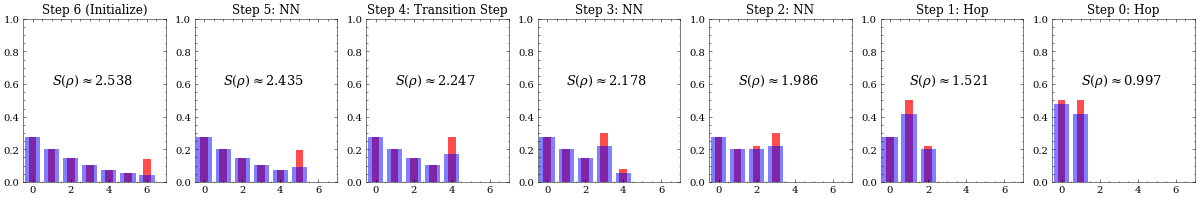

In [41]:
# Histogram of Schmidt Coefficients for Quantum Protocol:

#if nc<nt:
  # extra_terms_to_list = 2
#if nc>=nt:
  # extra_terms_to_list = 1


# Get the classical coefficients to plot
Bell_Q = generateBellstate_reduced(N_C + 1)
pseudoTMSND_Q = generateTMSSvector(atanh(lamb_test), N_C + 1)
tparamsQ, indicesQ, y_vec_list_Q = t_parameters_2(pseudoTMSND_Q, Bell_Q, checkMajorization=False, checkLength=False)
# # Reverse classical coefficients:
y_vec_list_Q.reverse()


# Plot the Fock state distribution

# pseudoTMSND_1 = generateTMSSvector(atanh(lamb_test), N_C+1)  #generate R-vector for plotting in background
width_bar = 0.8 #width of bars in plot

fig, axes = plt.subplots(nrows = 1, ncols = N_C+1, figsize=(3*len(TMSS_list), 3))
entanglement_entropy_lst_classical = [] #stores entanglement entropy at each step of the transformation (classical)
entanglement_entropy_lst_quantum = [] #stores entanglement entropy at each step of the transformation (quantum)
entanglement_entropy_lst_quantum_norm_fixed = []
TMSS_norm_lst = []
N_norm = 0  #placeholder for the normalization coefficient at each step, initialize
N_norm_lst = [] #stores the N_norm value at each step
use_norm_adjusted_calculation = True

for idx, lst in enumerate(TMSS_list):

    N_transition = find_Transition_N(lamb_test)
    # plot classical coefficients:
    axes[idx].bar(np.arange(0, N_C+1), y_vec_list_Q[idx], width=0.5*width_bar, color="r", alpha=0.7, label = 'Classical')
    entanglement_entropy_lst_classical.append(entanglement_entropy_schmidt_form(y_vec_list_Q[idx]))

    # plot Fock-state distribution:
    if (use_norm_adjusted_calculation==True):
      N_norm = sum_arr_till_index(TMSS_list[idx], len(TMSS_list[idx])) #compute the norm at each step 
      N_norm_lst.append(N_norm)
      TMSS_norm_lst = [i/N_norm for i in TMSS_list[idx]] #normalized TMSS_list by dividing by 1/N^2
      # print(idx, TMSS_list[idx], N_norm, TMSS_norm_lst) 
      entanglement_entropy_lst_quantum_norm_fixed.append(entanglement_entropy_schmidt_form(TMSS_norm_lst))  #norm-adjusted entanglement entropy 
      axes[idx].bar(np.arange(0, N_C+1), lst, width=width_bar, color="b", alpha=.5, label = 'Quantum')  #TMSS_norm_lst or lst 
      axes[idx].set_ylim(0, 1)
      axes[idx].set_xlim(-0.5, N_C+1)
      axes[idx].text(1, 0.6, r"$S(\rho) \approx$" + str(round(entanglement_entropy_schmidt_form(TMSS_norm_lst), 3)), fontsize = 13)

    if (use_norm_adjusted_calculation==False):
      axes[idx].bar(np.arange(0, N_C+1), TMSS_list[idx], width=width_bar, color="b", alpha=.5, label = 'Quantum')  #lst
      axes[idx].set_ylim(0, 1)
      axes[idx].set_xlim(-0.5, N_C+1)
      entanglement_entropy_lst_quantum.append(entanglement_entropy_schmidt_form(lst))
      axes[idx].text(1, 0.6, r"$S(\rho) \approx$" + str(round(entanglement_entropy_schmidt_form(lst), 3)), fontsize = 13)

    if idx == 0:
      axes[idx].set_title("Step "+ str(N_C-idx)+ " (Initialize)")
      # axes[idx].text(1, 0.6, r"$S(\rho) =$" + str(round(entanglement_entropy_schmidt_form(lst), 3)), fontsize = 13) #in classical case the Bell state entanglement entropy = 1 exactly 
    if idx > N_transition:
      axes[idx].set_title("Step "+ str(N_C-idx)+ ": Hop")
    if idx < N_transition and idx > 0:
      axes[idx].set_title("Step "+ str(N_C-idx)+ ": NN")
    if N_C-idx == N_transition:
      axes[idx].set_title("Step "+ str(N_C-idx)+ ": Transition Step")
    if idx == N_transition:
      axes[idx].set_title("Step "+ str(N_C-idx)+ ": NN")
fig.show()
# 

print(entanglement_entropy_lst_quantum_norm_fixed)

In [42]:
N_norm_lst  #N^2, only shows up if use_norm_adjusted_calculation==True 

[0.8972303304691158,
 0.8972303304691158,
 0.8972303304691158,
 0.8972303304691158,
 0.8972303304691158,
 0.8972303304691158,
 0.8972303304691158]

In [43]:
find_Transition_N(0.86)

4

In [44]:
A = [1,2,3]
B = []
N_A = sum_arr_till_index(A, 3)
# A = [i/N_A for i in A]
B.append([i/N_A for i in A])
B.append([i*2/N_A for i in A])
B
len(entanglement_entropy_lst_quantum_norm_fixed)
# len(entanglement_entropy_lst_quantum)

7

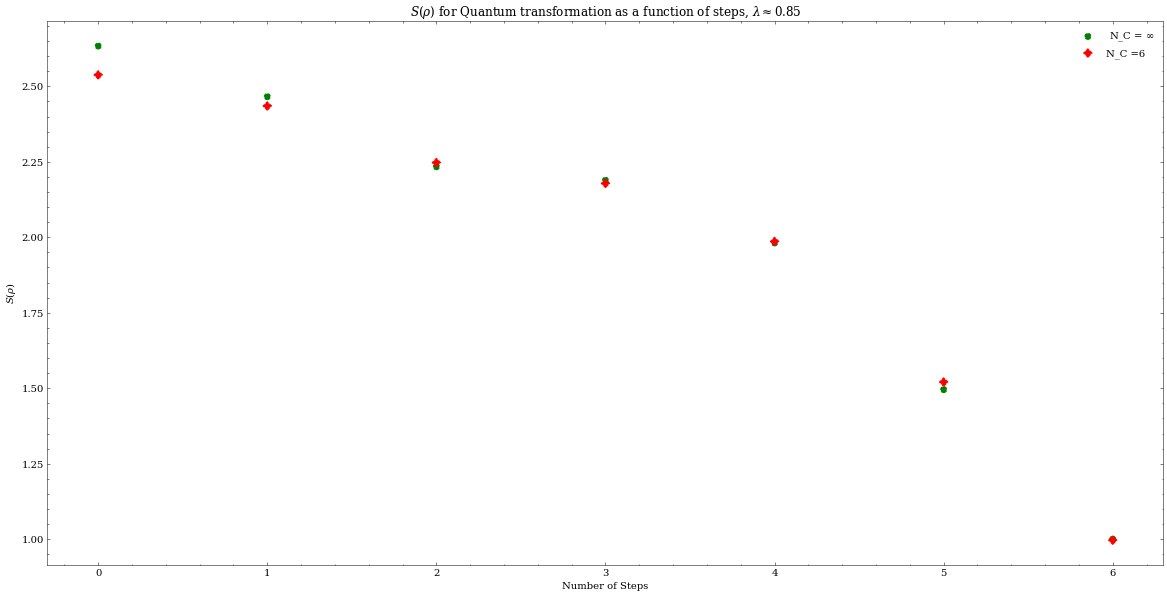

In [45]:
# Plot entanglement entropy for quantum protocol:

# Classical + Quantum:
# Plot the entanglement entropy as a scatter plot 
fig1, axes1 = plt.subplots(1,1)
axes1.scatter(np.arange(0, N_C+1), entanglement_entropy_lst_classical, color='green', linestyle='dashed', marker='o', label = r' N_C = $\infty$')  #Classical
if (use_norm_adjusted_calculation==False):
  axes1.scatter(np.arange(0, N_C+1), entanglement_entropy_lst_quantum, color='red', linestyle='dashed', marker='D', label = 'Quantum')
if (use_norm_adjusted_calculation==True):
  axes1.scatter(np.arange(0, N_C+1), entanglement_entropy_lst_quantum_norm_fixed, color='red', linestyle='dashed', marker='D', label = 'N_C =' + str(N_C))
axes1.set_xticks(range(0,N_C+1))
axes1.set_xlabel("Number of Steps")
axes1.set_ylabel(r"$S(\rho)$")
axes1.set_title(r"$S(\rho)$ for Quantum transformation as a function of steps, $\lambda \approx $" + str(round(lamb_test, 4)))
axes1.legend()
fig1.show()

# 

[29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
NC: 29
TMSS list: [[0.09750000000000003, 0.08799375000000002, 0.07941435937500001, 0.0716714593359375, 0.06468349205068359, 0.05837685157574194, 0.05268510854710709, 0.04754831046376415, 0.04291235019354714, 0.03872839604967629, 0.03495237743483284, 0.03154452063493664, 0.028468929873030315, 0.025693209210409858, 0.023188121312394894, 0.02092727948443639, 0.01888686973470384, 0.017045399935570214, 0.015383473441852117, 0.013883584781271534, 0.012529935265097557, 0.011308266576750546, 0.010205710585517367, 0.009210653803429423, 0.008312615057595053, 0.007502135089479535, 0.006770676918255279, 0.006110535918725389, 0.005514758666649663, 0.00497706969665132]]
k_ptr: 29
k_ptr: 28
k_ptr: 27
k_ptr: 26
k_ptr: 25
k_ptr: 24
k_ptr: 23
k_ptr: 22
k_ptr: 21
k_ptr: 20
k_ptr: 19
k_ptr: 1

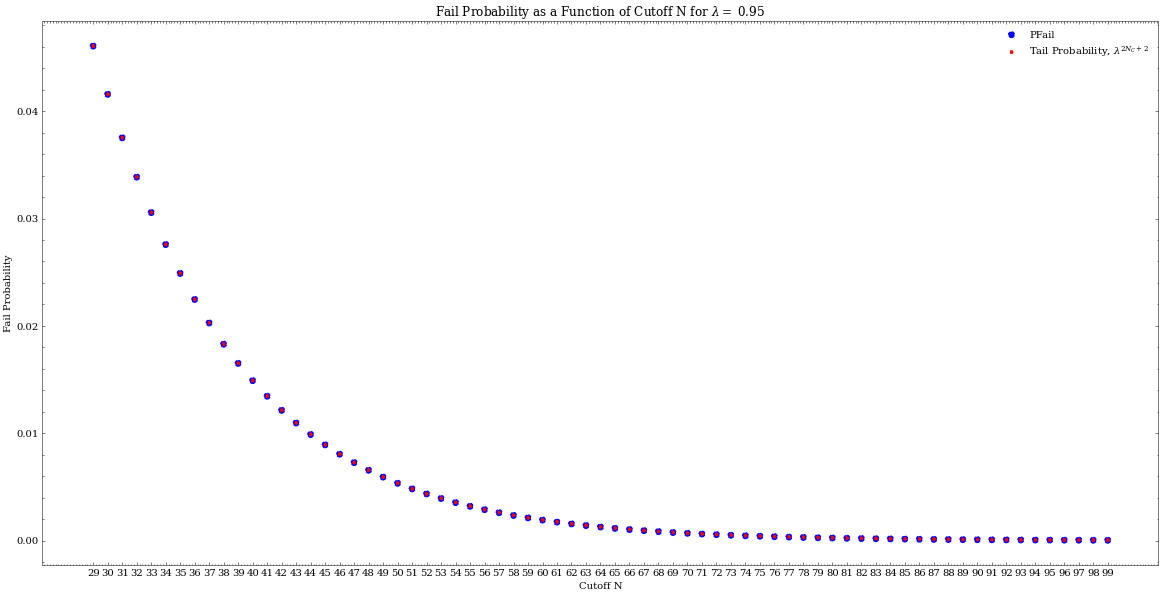

In [46]:
# Fail probability as a function of N_C:

lambda_test = 0.95
N_C_min = find_Transition_N(lambda_test) +1 #28 #minimum N_C to run in code
N_C_max = 100
N_C_lst = np.arange(N_C_min, N_C_max, 1) #generate lots of N_C
print(N_C_lst)
P_fail_lst = [] #initiate P_fail list
Tail_fail_P_lst = [] #initiate getting the tail's probability list

for i in range(0, len(N_C_lst)):
  TMSS_list_Q = []*(N_C_lst[i]+1) #initiate
  PFail_Q = 0 #initiate
  print('NC:', N_C_lst[i])
  TMSS_list_Q, PFail_Q, PSuccess_Q = quantum_protocol(lambda_test, N_C_lst[i])
  print('P_Fail:', PFail_Q)
  P_fail_lst.append(PFail_Q)
  print(P_fail_lst)
  NC = N_C_lst[i]
  Tail_fail_P_lst.append(lambda_test**(2*NC+2))

# Plot:
figP, axesP = plt.subplots(1,1)
axesP.scatter(np.arange(0+N_C_min, len(N_C_lst)+N_C_min), P_fail_lst, color='blue', linestyle='dashed', marker='o', label = 'PFail')
axesP.scatter(np.arange(0+N_C_min, len(N_C_lst)+N_C_min), Tail_fail_P_lst, color='red', linestyle='dashdot', marker='.', label = r'Tail Probability, $\lambda^{2N_C+2}$')
axesP.set_xticks(np.arange(N_C_min, N_C_max, 1))
axesP.set_xlabel("Cutoff N")
axesP.set_ylabel(r"Fail Probability")
axesP.set_title(r"Fail Probability as a Function of Cutoff N for $\lambda = $ " + str(round(lambda_test, 4)))
axesP.legend()
figP.show()


[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]
NC: 2
TMSS list: [[0.4999999999999998, 0.25, 0.12500000000000006]]
k_ptr: 2
P_Fail: 0.1250000000000001
P_Success: 0.8749999999999999
[0.8749999999999999]
NC: 3
TMSS list: [[0.4999999999999998, 0.25, 0.12500000000000006, 0.06250000000000006]]
k_ptr: 3
k_ptr: 2
k_ptr: 1
P_Fail: 0.06250000000000011
P_Success: 0.9374999999999999
[0.8749999999999999, 0.9374999999999999]
NC: 4
TMSS list: [[0.4999999999999998, 0.25, 0.12500000000000006, 0.06250000000000006, 0.03125000000000004]]
k_ptr: 4
k_ptr: 3
k_ptr: 2
k_ptr: 1
P_Fail: 0.03125
P_Success: 0.96875
[0.8749999999999999, 0.9374999999999999, 0.96875]
NC: 5
TMSS list: [[0.4999999999999998, 0.25, 0.12500000000000006, 0.06250000000000006, 0.03125000000000004, 0.015625000000000028]]
k_ptr: 5
k_ptr: 4
k_ptr: 3
k_ptr: 2
k_ptr: 1
P_Fail: 0.015625
P_Success: 0.984375
[0.8749999999999999, 0.9374999999999999, 0.96875, 0.984375]
NC: 6
TMSS list: [[0.4999999999999998, 0.2

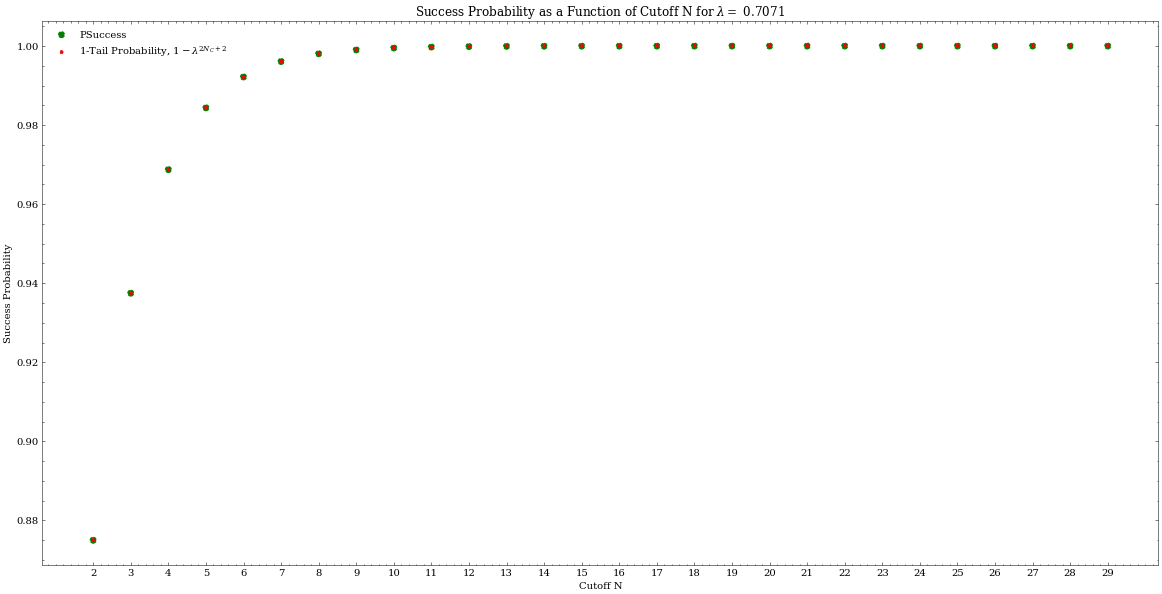

In [47]:
# P_success as a function of N_C:

# Fail probability as a function of N_C:

lambda_test = 2**(-1/2)#0.85
N_C_min = find_Transition_N(lambda_test) #5 #minimum N_C to run in code
N_C_max = 30
N_C_lst = np.arange(N_C_min, N_C_max, 1) #generate lots of N_C
print(N_C_lst)
P_success_lst = [] #initiate P_success list
P_success_tail_lst = [] #initiate P_success_tail_list

for i in range(0, len(N_C_lst)):
  TMSS_list_Q = []*(N_C_lst[i]+1) #initiate
  PFail_Q = 0 #initiate
  P_success_Q = 0 #initiate
  print('NC:', N_C_lst[i])
  TMSS_list_Q, PFail_Q, P_success_Q = quantum_protocol(lambda_test, N_C_lst[i])
  print('P_Fail:', PFail_Q)
  print('P_Success:', P_success_Q)
  P_success_lst.append(P_success_Q)
  print(P_success_lst)
  NC = N_C_lst[i]
  P_success_tail_lst.append(1-lambda_test**(2*NC+2))

difference_lst = [abs(P_success_lst[i]-P_success_tail_lst[i]) for i in range(0, len(P_success_tail_lst))]

# Plot:
figP, axesP = plt.subplots(1,1)
axesP.scatter(np.arange(0+N_C_min, len(N_C_lst)+N_C_min), P_success_lst, color='green', linestyle='dashed', marker='o', label = 'PSuccess')
axesP.scatter(np.arange(0+N_C_min, len(N_C_lst)+N_C_min), P_success_tail_lst, color='red', linestyle='dashdot', marker='.', label = r'1-Tail Probability, $1-\lambda^{2N_C+2}$')
# axesP.scatter(np.arange(0+N_C_min, len(N_C_lst)+N_C_min), difference_lst, color='green', linestyle='dashed', marker='o', label = 'difference') 
axesP.set_xticks(np.arange(N_C_min, N_C_max, 1))
axesP.set_xlabel("Cutoff N")
axesP.set_ylabel(r"Success Probability")
axesP.set_title(r"Success Probability as a Function of Cutoff N for $\lambda = $ " + str(round(lambda_test, 4)))
axesP.legend()
figP.show()

# P_success as a function of N_C:

# Fail probability as a function of N_C:

lambda_test = 0.85
N_C_min = 5 #minimum N_C to run in code
N_C_max = 30
N_C_lst = np.arange(N_C_min, N_C_max, 1) #generate lots of N_C
print(N_C_lst)
P_success_lst = [] #initiate P_success list
P_success_tail_lst = [] #initiate P_success_tail_list

for i in range(0, len(N_C_lst)):
  TMSS_list_Q = []*(N_C_lst[i]+1) #initiate
  PFail_Q = 0 #initiate
  P_success_Q = 0 #initiate
  print('NC:', N_C_lst[i])
  TMSS_list_Q, PFail_Q, P_success_Q = quantum_protocol(lambda_test, N_C_lst[i])
  print('P_Fail:', PFail_Q)
  print('P_Success:', P_success_Q)
  P_success_lst.append(P_success_Q)
  print(P_success_lst)
  NC = N_C_lst[i]
  P_success_tail_lst.append(1-lambda_test**(2*NC+2))

# Plot:
figP, axesP = plt.subplots(1,1)
axesP.scatter(np.arange(0+N_C_min, len(N_C_lst)+N_C_min), P_success_lst, color='green', linestyle='dashed', marker='o', label = 'PSuccess')
axesP.scatter(np.arange(0+N_C_min, len(N_C_lst)+N_C_min), P_success_tail_lst, color='red', linestyle='dashdot', marker='.', label = r'1-Tail Probability, $1-\lambda^{2N_C+2}$')
axesP.set_xticks(np.arange(N_C_min, N_C_max, 1))
axesP.set_xlabel("Cutoff N")
axesP.set_ylabel(r"Success Probability")
axesP.set_title(r"Success Probability as a Function of Cutoff N for $\lambda = $ " + str(round(lambda_test, 4)))
axesP.legend()
figP.show()


TMSS list: [[0.09750000000000003, 0.08799375000000002, 0.07941435937500001, 0.0716714593359375, 0.06468349205068359, 0.05837685157574194, 0.05268510854710709, 0.04754831046376415, 0.04291235019354714, 0.03872839604967629, 0.03495237743483284, 0.03154452063493664, 0.028468929873030315, 0.025693209210409858, 0.023188121312394894, 0.02092727948443639, 0.01888686973470384, 0.017045399935570214, 0.015383473441852117, 0.013883584781271534, 0.012529935265097557, 0.011308266576750546, 0.010205710585517367, 0.009210653803429423, 0.008312615057595053, 0.007502135089479535, 0.006770676918255279, 0.006110535918725389, 0.005514758666649663, 0.00497706969665132]]
k_ptr: 29
k_ptr: 28
k_ptr: 27
k_ptr: 26
k_ptr: 25
k_ptr: 24
k_ptr: 23
k_ptr: 22
k_ptr: 21
k_ptr: 20
k_ptr: 19
k_ptr: 18
k_ptr: 17
k_ptr: 16
k_ptr: 15
k_ptr: 14
k_ptr: 13
k_ptr: 12
k_ptr: 11
k_ptr: 10
k_ptr: 9
k_ptr: 8
k_ptr: 7
k_ptr: 6
k_ptr: 5
k_ptr: 4
k_ptr: 3
k_ptr: 2
k_ptr: 1
normlst [4.445938792006041, 4.434961109966838, 4.424515042326

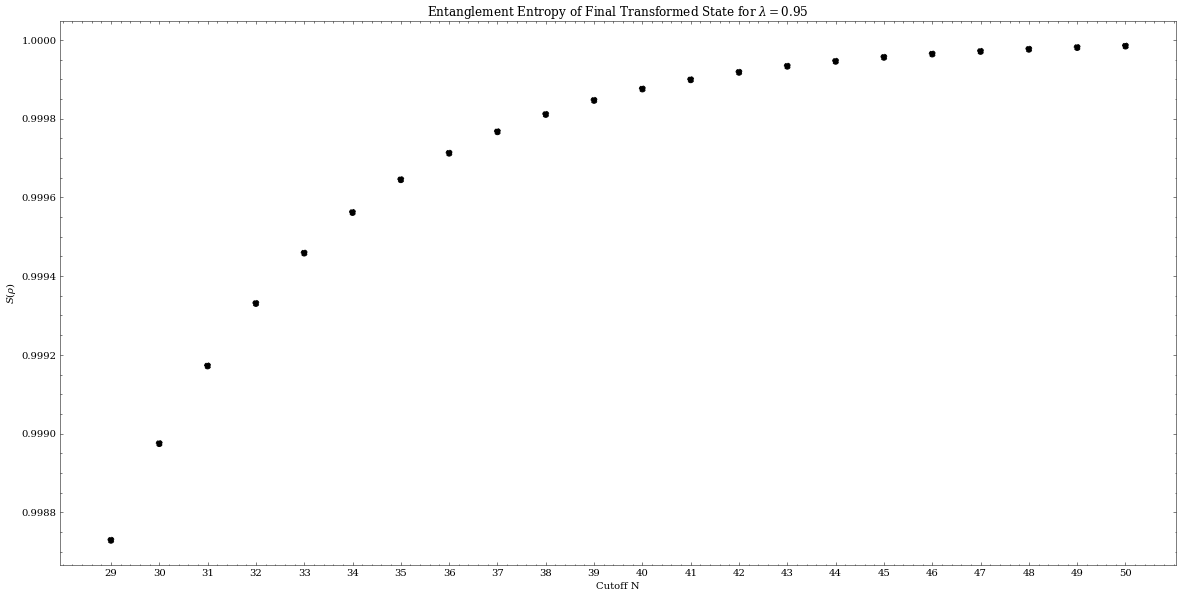

In [48]:
# Entanglement entropy for the final step of transformation as a function of N_C for a fixed lambda:

# LAMB_min = 2**(-1/2)
# LAMB_max = 0.86
# N_points_lambda = 100
# Lamb_LST = np.linspace(LAMB_min, LAMB_max, N_points_lambda) #initiate lambda list
# N_C_LST = [(find_Transition_N(lamb_k) + 1) for lamb_k in Lamb_LST]
Lamb_TST = 0.95
N_C_LST = np.arange(find_Transition_N(Lamb_TST) + 1, 51, 1)
final_entanglement_entropy_lst = [] #store entanglement entropy at last step

# for k in range(0, len(Lamb_LST)):
#   TMSS_list_k, PFail_k, P_success_k = quantum_protocol(Lamb_LST[k], N_C_LST[k])
#   # final_entanglement_entropy_lst.append(entanglement_entropy_schmidt_form(TMSS_list_k))
#   for idx, lst in enumerate(TMSS_list_k):
#     N_norm = sum_arr_till_index(TMSS_list_k[idx], len(TMSS_list_k[idx])) #compute the norm at each step 
#     TMSS_norm_lst = [i/N_norm for i in TMSS_list_k[idx]] #normalized TMSS_list by dividing by 1/N^2

#   final_entanglement_entropy_lst.append(entanglement_entropy_schmidt_form(TMSS_list_k[-1]))  #norm-adjusted entanglement entropy 
for k in range(0,len(N_C_LST)):
  TMSS_norm_lst = []  #initialize
  entanglement_entropy_lst_norm = [] #initialize
  TMSS_list_k, PFail_k, P_success_k = quantum_protocol(Lamb_TST, N_C_LST[k])
  for idx, lst in enumerate(TMSS_list_k):
    N_norm = sum_arr_till_index(lst, len(lst)) #compute the norm at each step 
    TMSS_norm_lst = [i/N_norm for i in lst] #normalized TMSS_list by dividing by 1/N^2
    entanglement_entropy_lst_norm.append(entanglement_entropy_schmidt_form(TMSS_norm_lst))  #norm-adjusted entanglement entropy 
  print('normlst', entanglement_entropy_lst_norm)
  final_entanglement_entropy_lst.append(entanglement_entropy_lst_norm[-1])
print(final_entanglement_entropy_lst)


# Plot
fig, ax = plt.subplots(1,1)
ax.scatter(N_C_LST, final_entanglement_entropy_lst, color = 'black', linestyle = 'dashed', marker = 'o')
ax.set_xticks(np.arange(N_C_LST[0], N_C_LST[-1]+1, 1))
ax.set_xlabel("Cutoff N")
ax.set_ylabel(r"$S(\rho)$")
ax.set_title(r"Entanglement Entropy of Final Transformed State for $\lambda = $" + str(Lamb_TST))
fig.show()

TMSS list: [[0.4999999999999998, 0.25, 0.12500000000000006, 0.06250000000000006]]
k_ptr: 3
k_ptr: 2
k_ptr: 1
fidlst [1.7485281374238573, 1.4346623566797665, 0.9988876691913419, 0.9988876515698588]
TMSS list: [[0.4999999999999998, 0.25, 0.12500000000000006, 0.06250000000000006, 0.03125000000000004]]
k_ptr: 4
k_ptr: 3
k_ptr: 2
k_ptr: 1
fidlst [2.0386608003172593, 1.798769260627638, 1.447742855380355, 0.9997398045584237, 0.9997397866074086]
TMSS list: [[0.4999999999999998, 0.25, 0.12500000000000006, 0.06250000000000006, 0.03125000000000004, 0.015625000000000028]]
k_ptr: 5
k_ptr: 4
k_ptr: 3
k_ptr: 2
k_ptr: 1
fidlst [2.2666105485124084, 2.0873163737705367, 1.817048810505656, 1.4528294076667592, 0.9999370259778944, 0.9999370078737657]
TMSS list: [[0.4999999999999998, 0.25, 0.12500000000000006, 0.06250000000000006, 0.03125000000000004, 0.015625000000000028, 0.007812500000000017]]
k_ptr: 6
k_ptr: 5
k_ptr: 4
k_ptr: 3
k_ptr: 2
k_ptr: 1
fidlst [2.440885228733663, 2.308973141748059, 2.106475090899

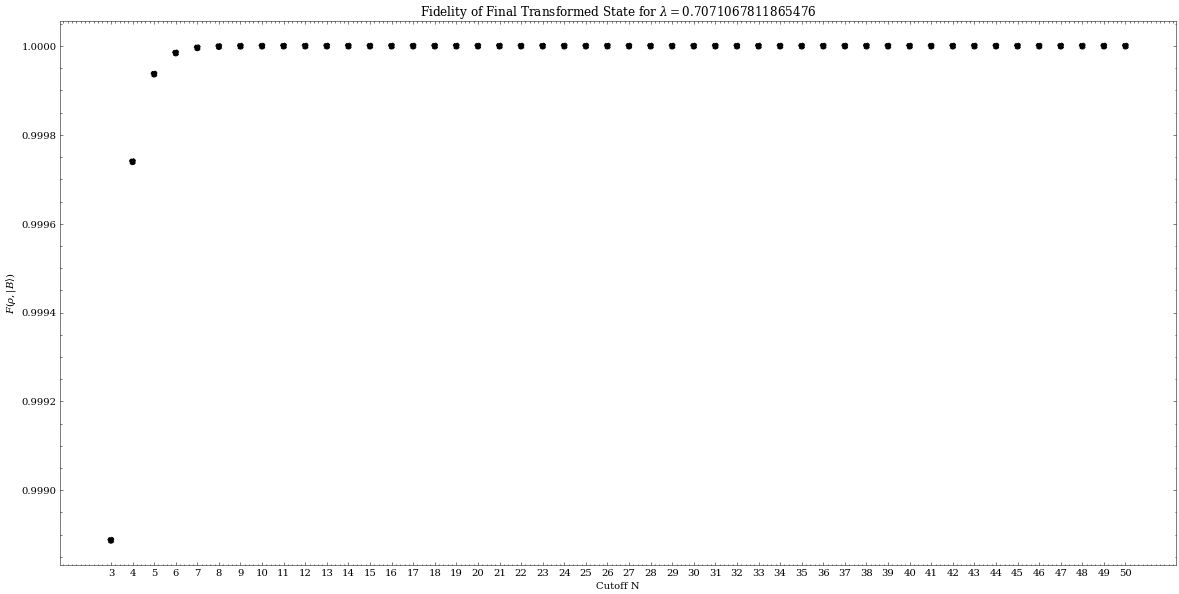

In [49]:
# Fidelity plot for final state after transformation
# F = (1/2) |\sqrt(alpha') + \sqrt(beta')|^2

def fidelity_schmidt_form(vec): #takes in a vector of schmidt coefficients (lambda) for state |psi> = Sum_k sqrt{lambda} |kk>
  # Assume the vector is already sorted in the computational basis
  fidelity = 0

  for i in range(0, len(vec)):
    if vec[i] != 0:
      fidelity += sqrt(vec[i]) 
  fidelity = 0.5*(fidelity**2)

  return fidelity


Lamb_FTST = 2**(-1/2)#0.75
N_C_FLST = np.arange(find_Transition_N(Lamb_FTST) + 1, 51, 1)
fidelity_lst = [] #store fidelity at last step

for k in range(0,len(N_C_FLST)):
  TMSS_norm_lst = []  #initialize
  fidelity_lst_norm = [] #initialize
  TMSS_list_k, PFail_k, P_success_k = quantum_protocol(Lamb_FTST, N_C_FLST[k])
  for idx, lst in enumerate(TMSS_list_k):
    N_norm = sum_arr_till_index(lst, len(lst)) #compute the norm at each step 
    TMSS_norm_lst = [i/N_norm for i in lst] #normalized TMSS_list by dividing by 1/N^2
    fidelity_lst_norm.append(fidelity_schmidt_form(TMSS_norm_lst))  #norm-adjusted fidelity
  print('fidlst', fidelity_lst_norm)
  fidelity_lst.append(fidelity_lst_norm[-1])
print(fidelity_lst)


# Plot
fig, ax = plt.subplots(1,1)
ax.scatter(N_C_FLST, fidelity_lst, color = 'black', linestyle = 'dashed', marker = 'o')
ax.set_xticks(np.arange(N_C_FLST[0], N_C_FLST[-1]+1, 1))
ax.set_xlabel("Cutoff N")
ax.set_ylabel(r"$F(\rho, |B\rangle)$")
ax.set_title(r"Fidelity of Final Transformed State for $\lambda = $" + str(Lamb_FTST))
fig.show()


In [50]:
# 3D Fail Probability Graph, P_fail(N_C, lambda):




In [51]:
find_Transition_N(0.95)

28

In [52]:
for i in range(1,3+1):
  print(i) 

1
2
3


In [53]:
for j in range(1,2):
  print(j)

1


In [54]:
print(generateTMSSvector(atanh(0.75), 5))
print(generateTMSSvector(atanh(0.75), 5)[5-1])  #-1 for pythonic indexing, just keep it 

[0.4375, 0.24609375, 0.138427734375, 0.0778656005859375, 0.043799400329589844]
0.043799400329589844


In [55]:
5+(-1)

4

In [56]:
lst = []
lst1 = [1,2,3]
lst2 = [3,2,1]
lst.append(lst1)
lst.append(lst2)
lst

[[1, 2, 3], [3, 2, 1]]

In [57]:
lst.reverse()
lst

[[3, 2, 1], [1, 2, 3]]

In [58]:
a = [1,2,3,4,5,6,7,8,9,10]
sum_arr_till_index(a, len(a))

55

In [59]:
truncated_TMSS = generateTMSSvector(atanh(0.95), 5+1)
truncated_TMSS

[0.09750000000000003,
 0.08799375000000002,
 0.07941435937500001,
 0.0716714593359375,
 0.06468349205068359,
 0.05837685157574194]

In [60]:
find_Transition_N(0.95)

28

In [61]:
from math import tanh, atanh, sqrt
print('l')

def generateTMSS_SMALLvector(r, N_C): #generates an N-length TMSS vector (renormalized) with squeezing parameter r
  lamb = tanh(r)
  f = 0.5 - lamb**2 + 0.5*(lamb**(2*N_C+2)) #majorization condition: 0 >= f(lamb, N_C)
  if f > 0:
    print("Less than minimum r by Nielsen criteria \n")
    return False

  alpha_sq = 1- lamb**(2*N_C+2) #normalization for each term
  TMSSvector = [0]*N_C  #instantiate

  for i in range (0, N_C):
    TMSSvector[i] = (1-lamb**2)*(lamb)**(2*i) #generate
    TMSSvector[i] = TMSSvector[i]/alpha_sq #renormalize

  print(TMSSvector)
  return TMSSvector

  # Test
  print('h1')
  generateTMSS_SMALLvector(atanh(0.8), 10)
  print('hi')

l


|SMALL> code:

[0.19230234271783142, 0.15576489760144346, 0.1261695670571692, 0.10219734931630706, 0.08277985294620874, 0.06705168088642909, 0.054311861518007556, 0.04399260782958612, 0.035634012341964755, 0.028863549996991457, 0.02337947549756308, 0.018937375153026098, 0.01533927387395114, 0.012424811837900424, 0.010064097588699344, 0.00815191904684647, 0.0066030544279456396, 0.005348474086635968, 0.004332264010175135, 0.0035091338482418598]
x [0.19230234271783142, 0.15576489760144346, 0.1261695670571692, 0.10219734931630706, 0.08277985294620874, 0.06705168088642909, 0.054311861518007556, 0.04399260782958612, 0.035634012341964755, 0.028863549996991457, 0.02337947549756308, 0.018937375153026098, 0.01533927387395114, 0.012424811837900424, 0.010064097588699344, 0.00815191904684647, 0.0066030544279456396, 0.005348474086635968, 0.004332264010175135, 0.0035091338482418598]
y [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k 3
x_after [0.19230234271783142, 0.15576489760144346, 0.1261695

[]

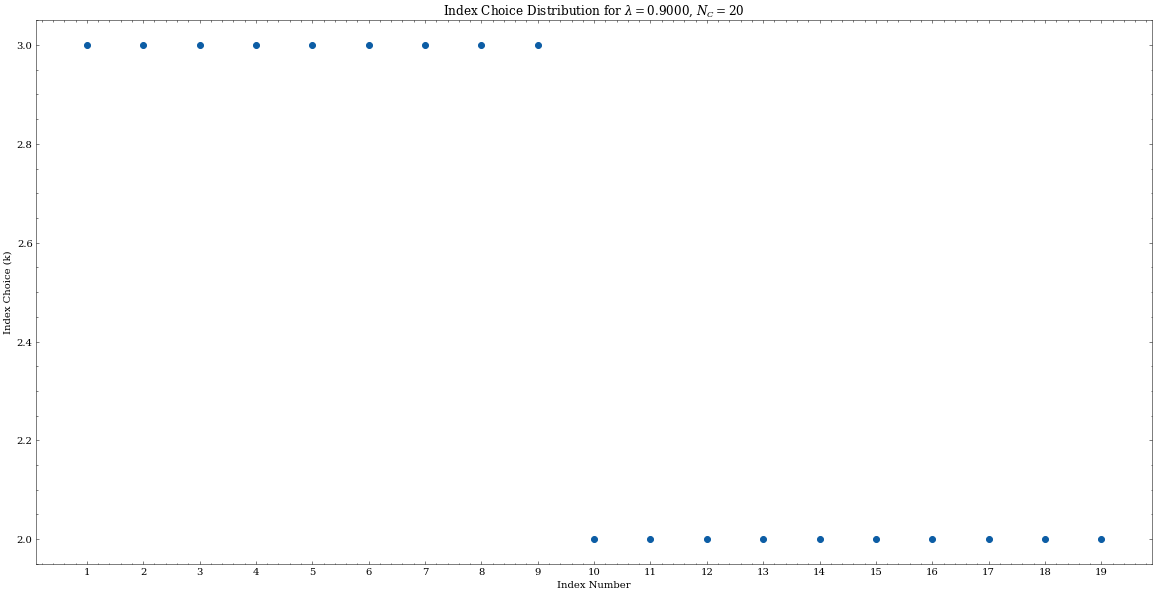

In [62]:
# |TMSS> = alpha |small'> + beta |Tail'>
# Check the index distribution of the TMSS --> Bell state conversion for truncated tail 

import matplotlib.pyplot as plt

lamb = 0.9 #1.01*2**(-0.5) #0.75  #0.86, 2**(-0.5)
r = atanh(lamb) #lambda = tanh(r), in this case lamb>=0.71 (r>=0.88) for majorization condition
N_C = 20 #dimension
# pseudoTMSND = generateTMSSvector(r, N_C, renormalize=True)
pseudoTMSND = generateTMSS_SMALLvector(r, N_C)
BellN_1 = generateBellstate_reduced(N_C+1)  #generate one larger than pseudoTMSND so that the last k-index is found (artefact of the code)
tparamsN, indicesN = t_parameters(pseudoTMSND,BellN_1, checkMajorization=False, checkLength=False, print_vals=True)
print('pseudoTMSND->Bell t parameters:', tparamsN, '\n') 
print('pseudoTMSND->Bell: Index choice:',indicesN)



# Plot
idx_array = [i for i in range(1,len(indicesN)+1)] #generate an indices number array (index 1, index 2, ..., index N)
plt.scatter(idx_array, indicesN)
plt.xticks(idx_array)
# plt.yticks(indicesN)  #new
# plt.yaxis.get_major_locator().set_params(integer=True)
# plt.title('Index Choice Distribution for '+ str(N)+ r' dimensional array with $\lambda = $'+ str(format(tanh(r),'0.4f')) + r', $N_C = $' + str(N_C))
plt.title('Index Choice Distribution for $\lambda = $'+ str(format(tanh(r),'0.4f')) + r', $N_C = $' + str(N_C))
plt.xlabel('Index Number')
plt.ylabel('Index Choice (k)')
plt.plot()

[0.4223999999999998, 0.24397823999999996, 0.14092183142400003, 0.08139644983050244, 0.04701458942209822, 0.02715562685020394, 0.015685090068677802, 0.0090597080236683, 0.0052328873544708115, 0.003022515735942342, 0.0017458050890802974, 0.00100837701945278, 0.000582438566435926, 0.0003364165159733909, 0.00019431417962623065, 0.00011223587015211086, 6.482743859985925e-05, 3.744432853527872e-05, 2.1627844161976996e-05, 1.2492242787957915e-05, 7.215519434324494e-06, 4.16768402526583e-06, 2.407254292993544e-06, 1.3904300796330714e-06, 8.031124139960623e-07, 4.6387773032412575e-07, 2.6793577703521506e-07, 1.547597048155403e-07, 8.93892055014561e-08, 5.163120509764105e-08, 2.9822184064397486e-08, 1.7225293515595994e-08, 9.949329534608249e-09, 5.746732739189726e-09, 3.3193128301559866e-09, 1.9172350906980984e-09, 1.1073949883872221e-09, 6.396313452924596e-10, 3.694510650409248e-10, 2.1339493516763824e-10, 1.232569145528279e-10, 7.119319384571342e-11, 4.112118876528408e-11, 2.375159863082809e-1

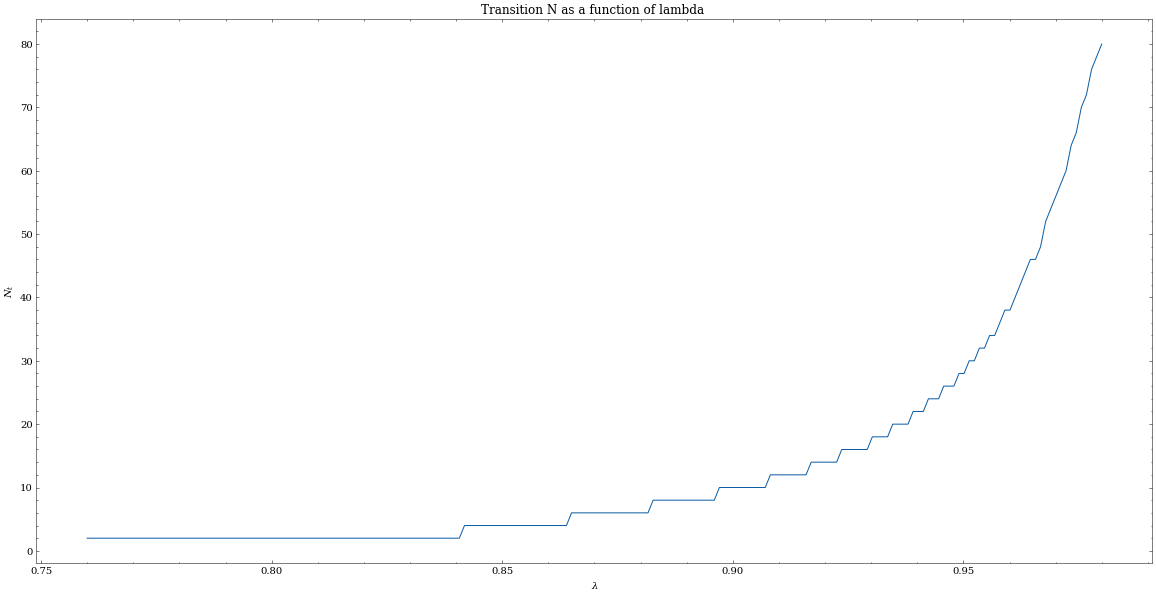

In [63]:
def find_Transition_N_SMALL(lamb):
  # lamb_crit_1 = 2**(-1/4) #first transition lambda ~8408964152537145, anything below this transitions at round 2
  lamb_crit_1 = 0.8408964152537145575472  #refined from manual testing of the code
  r = atanh(lamb) #lambda = tanh(r), in this case lamb>=0.71 (r>=0.88) for majorization condition
  N = 100 #dimension
  Transition_N = 0  #initialize
  pseudoTMSND = generateTMSS_SMALLvector(r, N)
  BellN_1 = generateBellstate_reduced(N+1)  #generate one larger than pseudoTMSND so that the last k-index is found (artefact of the code)


  if (lamb<lamb_crit_1):
    Transition_N = 2

  if (lamb>=lamb_crit_1):
    tparamsN, indicesN = t_parameters(pseudoTMSND,BellN_1, checkMajorization=False, checkLength=False, print_vals=False)
    for i in range(0, len(indicesN)):
      if indicesN[i]==2 and indicesN[i-1]==3:
        Transition_N = i+1  #it is one more because that is the first round where k=2
  
  return Transition_N


# Plot transition N:
lamb_min = 0.76 #2**(-1/2)
upper_lamb = 0.98 #0.98
N = 200
lamb_list = np.linspace(lamb_min, upper_lamb, N)

n_list = []
for i in range(0, len(lamb_list)):
  n_list.append(find_Transition_N_SMALL(lamb_list[i]))
  print('k, n, lamb:', n_list[i], i, lamb_list[i])
N_List = np.array(n_list)

# plt.plot(N_List, lamb_list) #matches contour plot axes layout
plt.plot(lamb_list, N_List) #traditional layout
plt.ylabel(r"$N_t$")
plt.xlabel(r"$\lambda$")
plt.locator_params(axis="y", integer=True, tight=True)
plt.title("Transition N as a function of lambda ")
plt.show()

[0.27750000000000163, 0.20049375000000114, 0.14485673437500082, 0.1046589905859381, 0.07561612069834027, 0.05463264720455084, 0.03947208760528798, 0.028518583294820567, 0.020604676430507857, 0.014886878721041927, 0.01075576987595279, 0.007771043735375891, 0.0056145790988090805, 0.004056533398889561, 0.002930845380697708, 0.0021175357875540934, 0.0015299196065078325, 0.001105366915701909, 0.0007986275965946292, 0.0005770084385396196, 0.0004168885968448751, 0.0003012020112204223, 0.00021761845310675507, 0.0001572293323696305, 0.00011359819263705804, 8.207469418027445e-05, 5.929896654524828e-05, 4.2843503328941876e-05, 3.09544311551605e-05, 2.2364576509603465e-05, 1.61584065281885e-05, 1.1674448716616192e-05, 8.434789197755199e-06, 6.0941351953781304e-06, 4.403012678660699e-06, 3.1811766603323547e-06, 2.2984001370901263e-06, 1.660594099047616e-06, 1.1997792365619026e-06, 8.668404984159746e-07, 6.262922601055416e-07, 4.5249615792625376e-07, 3.2692847410171833e-07, 2.362058225384915e-07, 1.

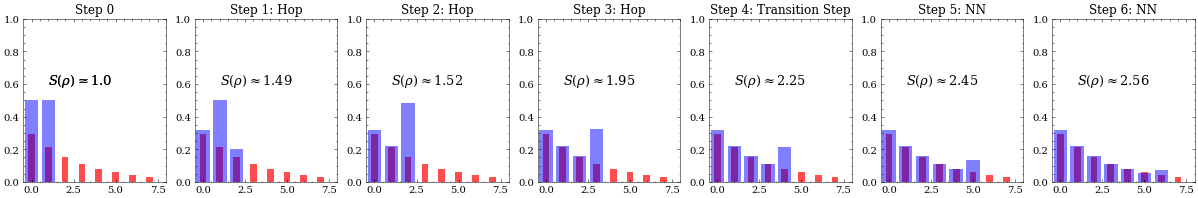

In [64]:
def t_parameters_3(x, y, checkMajorization = False, checkLength = True, print_vals = False): # x majorized by y; finds t-parameters such that x = Dy, D = T_r...T_2 T_1
  # First sort vectors into descending order
  x_copy =  bubbleSort(x) 
  y_copy = bubbleSort(y)
  lamb = np.sqrt(1-x_copy[0])
  N = len(x)
  t_parameters_list = []
  index_choice_list = []  #which index is chosen at each reduced vector step
  y_vec_list = []   #stores a list of the transformed vectors from each step
  y_vec_list.append(generateTMSS_SMALLvector(atanh(lamb), N)[0:0] + y_copy) 
  if (print_vals==True):
    print(y_vec_list)

  if (checkLength ==True):
    if (len(x)!= len(y)):
      print("Unequal lengths \n")
      return False  #or break?
  if (checkMajorization==True):
    if (isMajorized(x,y)==False):
      print("Not majorized \n")
      return t_parameters_list, index_choice_list  #or break?

  # y_n <= x_1 <= y_1 and y_k <= x_1 <= y_{k-1}
  # Therefore x_1 = t*y_1 + (1-t)*y_k
  # Therefore t = (x_1-y_k)/(y_1-y_k)
  i=0
  k=0
  t=0
  while i < len(x)-1: #iterate appropriate amount of times (1 less than dimension of x,y)
    if (print_vals==True):
      print('x', x_copy)
      print('y', y_copy)
    k = find_k_idx(x_copy, y_copy)  #Find appropriate k index
    if (print_vals==True):
      print('k', k+1)
    index_choice_list.append(k+1) #append index choice; k+1 because Python starts from 0
    t = (x_copy[0]-y_copy[k])/(y_copy[0]-y_copy[k]) #Write down t
    t_parameters_list.append(t)  #Append t to list
    old_yk = y_copy[k]
    y_copy[k] = t*y_copy[k] + (1-t)*y_copy[0] #Change k-th index entry according to T-transform
    y_copy[0] = t*y_copy[0] + (1-t)*old_yk #Change 0-th index entry according to T-transform
    if (print_vals==True):
      print('x_after', x_copy)
      print('y_after', y_copy)
    y_copy = y_copy[1:] # Pop the first index to get reduced vector
    x_copy = x_copy[1:] # Pop the first index to get reduced vector
    i+=1
    y_vec_list.append(generateTMSS_SMALLvector(atanh(lamb), N)[0:i] + y_copy)   #generates the full-length transformed vector after the step performed in the loop
    if (print_vals==True):
      print(y_vec_list)

    if (t>1 or t<0):  #out of bounds t condition
      print("Incorrect t obtained \n")
      return False  #or break?

  return t_parameters_list, index_choice_list, y_vec_list


# Test Code:

# 5D pseudo-TMS->Bell state case:
lamb =  0.85 #2**(-1/4) + 0.01  #lambda = tanh(r), in this case lamb>=0.72 for majorization condition
N_dim = find_Transition_N_SMALL(lamb) + 3
# N = 1 + lamb**2 + lamb**4 + lamb**6 + lamb**8 #normalization
# pseudoTMS5D = [1/N, lamb**2/N, lamb**4/N, lamb**6/N, lamb**8/N]
pseudoTMSND = generateTMSS_SMALLvector(atanh(lamb), N_dim)
# Bell = [1/2, 1/2, 0, 0, 0]
Bell = generateBellstate_reduced(N_dim + 1)
tparams4, indices4, y_vec_list_4 = t_parameters_3(pseudoTMSND, Bell, checkMajorization=False, checkLength=False)
print('pseudoTMS5D->Bell: t_parameters', tparams4, '\n') #[0.927214719760047, 0.4840011596679688, 0.5322245322245323, 0.6400000000000001] 
print('pseudoTMS5D->Bell: Index choice:',indices4)
print('pseudoTMS5D->Bell: y_vec_list_4:', y_vec_list_4)
print('TMSS sequence: ', pseudoTMSND)


# Plot the Fock state distribution

N=len(y_vec_list_4)
pseudoTMSND_1 = generateTMSS_SMALLvector(atanh(lamb), N_dim+1)  #generate R-vector for plotting in background
width_bar = 0.8 #width of bars in plot

fig, axes = plt.subplots(nrows = 1, ncols = N, figsize=(3*len(y_vec_list_4), 3))
entanglement_entropy_lst = [] #stores entanglement entropy at each step of the transformation

for idx, lst in enumerate(y_vec_list_4):
    N_transition = find_Transition_N(lamb)
    # plot R-vector:
    axes[idx].bar(np.arange(0, N+1), pseudoTMSND_1, width=0.5*width_bar, color="r", alpha=0.7, label = 'R')
    # plot its fock-state distribution:
    axes[idx].bar(np.arange(0, N+1), lst, width=width_bar, color="b", alpha=.5, label = 'B')
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xlim(-0.5, N+1)
    entanglement_entropy_lst.append(entanglement_entropy_schmidt_form(lst))
    axes[idx].text(1, 0.6, r"$S(\rho) \approx$" + str(round(entanglement_entropy_schmidt_form(lst), 2)), fontsize = 13)
    # axes[idx].set_title("Step "+ str(idx))

    if idx == 0:
      axes[idx].set_title("Step "+ str(idx))
      axes[idx].text(1, 0.6, r"$S(\rho) =$" + str(round(entanglement_entropy_schmidt_form(lst), 2)), fontsize = 13) #in classical case the Bell state entanglement entropy = 1 exactly 
    if idx > N_transition:
      axes[idx].set_title("Step "+ str(idx)+ ": NN")
    if idx < N_transition and idx > 0:
      axes[idx].set_title("Step "+ str(idx)+ ": Hop")
    if idx == N_transition:
      axes[idx].set_title("Step "+ str(idx)+ ": Transition Step")
fig.show()
# 

In [65]:
def quantum_protocol_SMALL(LAMB, n_cutoff): #transforms |r, n_cutoff> (truncated TMSS) for n_cutoff number of times (towards the Bell state)

  N_t = find_Transition_N_SMALL(LAMB)
  truncated_TMSS = generateTMSS_SMALLvector(atanh(LAMB), n_cutoff+1)  #need 1 more because to go backwards one more term is required
  # N = n_cutoff  #counter in loop
  k_pointer = n_cutoff  #points to element to transform; counter ranges from 1 to n_cutoff

  transformed_vector = []       #initiate empty list to store transformed vector at each step
  transformed_TMSS_list = []    #list of transformed vectors at each step 
  transformed_TMSS_list.append(truncated_TMSS[:])  #add the initial truncated TMSS list
  print("TMSS list:", transformed_TMSS_list)

  # if (n_cutoff <= N_t):   # skipping transition step, change later if not a problem
  #   return -1

  # Number of steps to transform:
  # if (n_cutoff<N_t):
  #   N_steps = n_cutoff  #only Hop
  # if (n_cutoff>N_t):
  #   N_steps = n_cutoff-N_t	#Old case, all 3 (NN, Transition, Hop)
  # if (n_cutoff=N_t):
  #   N_steps = n_cutoff  #one transition, rest Hop

  N_hop_steps = 0 #number of times to perform hop-->hop transformation

  if (N_t > n_cutoff):
    N_hop_steps = n_cutoff
    truncated_TMSS = generateTMSS_SMALLvector(atanh(LAMB), n_cutoff+2)  #need 2 more for NC<Nt, because hop transform is applied to |n+2, n+2>, |nn> terms
  if (N_t < n_cutoff):
    N_hop_steps = N_t-1

  #Transform n_cutoff number of times:
  transformed_vector = truncated_TMSS

  if ((n_cutoff-N_t)>=0):  
    for i in range(1, n_cutoff-N_t+1):  #NN-->NN/Transition, n_cutoff-N_t steps 
      # print('i, NN to NN/Transition:',i)
      print('k_ptr:', k_pointer)
      cos_squared_zeta = transformed_vector[k_pointer ] + transformed_vector[k_pointer-1 ]  #|n+1, n+1>, |nn> coefficients respectively
      transformed_vector[k_pointer-1 ] = cos_squared_zeta
      transformed_vector[k_pointer ] = 0
      transformed_TMSS_list.append(transformed_vector[:])
      k_pointer = k_pointer-1
      # print(transformed_TMSS_list)
  
    for j in range(1,1+1):              #Transition-->Hop, 1 step
      # print('j, Transition to Hop:', i+j)
      print('k_ptr:', k_pointer)
      cos_squared_zeta = transformed_vector[k_pointer ] + transformed_vector[k_pointer-1 ]  #|n+1, n+1>, |nn> coefficients respectively
      # sin_squared_gamma = 4*(LAMB**2 - LAMB**4)   #sin^2(gamma) 
      sin_squared_gamma = (np.sin(np.arccos(2*transformed_vector[k_pointer ] -1)))**2   #sin^2(gamma) = 4*alpha_+*alpha_-
      sin_squared_2delta = (sin_2delta(LAMB))**2  #sin^2(2delta) 
      lamb_plus = 0.5 * (1+sqrt(1-sin_squared_2delta*sin_squared_gamma))
      lamb_minus = 0.5 * (1-sqrt(1-sin_squared_2delta*sin_squared_gamma))
      transformed_vector[k_pointer-1 ] = lamb_plus*(cos_squared_zeta)
      transformed_vector[k_pointer ] = lamb_minus*(cos_squared_zeta)
      transformed_TMSS_list.append(transformed_vector[:])
      k_pointer = k_pointer-1
      # print(transformed_TMSS_list) 

  if (k_pointer>0): #will only enter hop loop if k_pointer >0, i.e. there are still transformation steps left
    for k in range(1, N_hop_steps+1):         #Hop-->Hop, N_hop_steps # of steps
      # print('k, Hop to Hop:', i+j+k) 
      print('k_ptr:', k_pointer)
      cos_squared_zeta = transformed_vector[k_pointer+1 ] + transformed_vector[k_pointer-1 ]  #|n+2, n+2>, |nn> coefficients respectively
      transformed_vector[k_pointer-1 ] = cos_squared_zeta
      transformed_vector[k_pointer+1 ] = 0
      transformed_TMSS_list.append(transformed_vector[:])
      k_pointer = k_pointer-1
      # print(transformed_TMSS_list)

  #Calculate Fail Probability: P_fail = 1-P_success
  P_fail = 0  #initiate
  P_fail = 1-sum_arr_till_index(transformed_TMSS_list[-1], len(transformed_TMSS_list[-1]))

  # Calculate P_success as |N|^2 = (alpha^2 + beta^2), where |psi> = N(alpha' |00> + beta' |11>) + |tail> after quantum transformation 
  P_success = 0 #initiate 
  P_success = sum_arr_till_index(transformed_TMSS_list[-1], len(transformed_TMSS_list[-1]))

  return transformed_TMSS_list, P_fail, P_success

# Test Code:
lamb_test = 0.85
N_C = find_Transition_N_SMALL(lamb_test) +2
TMSS_list, PFail, P_success = quantum_protocol_SMALL(lamb_test, N_C)
print("TMSS List: ", TMSS_list)
print("P_fail: ", PFail)
print("P_success: ", P_success)
# generateTMSSvector(atanh(lamb_test), N_C)
print('Nt:', find_Transition_N_SMALL(lamb_test))
# sum_arr_till_index(TMSS_list[-1], len(TMSS_list))

[0.27750000000000163, 0.20049375000000114, 0.14485673437500082, 0.1046589905859381, 0.07561612069834027, 0.05463264720455084, 0.03947208760528798, 0.028518583294820567, 0.020604676430507857, 0.014886878721041927, 0.01075576987595279, 0.007771043735375891, 0.0056145790988090805, 0.004056533398889561, 0.002930845380697708, 0.0021175357875540934, 0.0015299196065078325, 0.001105366915701909, 0.0007986275965946292, 0.0005770084385396196, 0.0004168885968448751, 0.0003012020112204223, 0.00021761845310675507, 0.0001572293323696305, 0.00011359819263705804, 8.207469418027445e-05, 5.929896654524828e-05, 4.2843503328941876e-05, 3.09544311551605e-05, 2.2364576509603465e-05, 1.61584065281885e-05, 1.1674448716616192e-05, 8.434789197755199e-06, 6.0941351953781304e-06, 4.403012678660699e-06, 3.1811766603323547e-06, 2.2984001370901263e-06, 1.660594099047616e-06, 1.1997792365619026e-06, 8.668404984159746e-07, 6.262922601055416e-07, 4.5249615792625376e-07, 3.2692847410171833e-07, 2.362058225384915e-07, 1.

[0.2997573055438248, 0.21657465325541336, 0.15647518697703616, 0.11305332259090863, 0.08168102557193148, 0.05901454097572049, 0.04263800585495805]
[0.3181488881647569, 0.22278143468672573, 0.1560010720998452, 0.10923861106524768, 0.07649353935097919, 0.05356404210361913, 0.03750782916860227]
[0.3181488881647569, 0.22278143468672573, 0.1560010720998452, 0.10923861106524768, 0.07649353935097919, 0.05356404210361913, 0.03750782916860227]
[0.3181488881647569, 0.22278143468672573, 0.1560010720998452, 0.10923861106524768, 0.07649353935097919, 0.05356404210361913, 0.03750782916860227]
[0.3181488881647569, 0.22278143468672573, 0.1560010720998452, 0.10923861106524768, 0.07649353935097919, 0.05356404210361913, 0.03750782916860227]
[0.3181488881647569, 0.22278143468672573, 0.1560010720998452, 0.10923861106524768, 0.07649353935097919, 0.05356404210361913, 0.03750782916860227]
[0.3181488881647569, 0.22278143468672573, 0.1560010720998452, 0.10923861106524768, 0.07649353935097919, 0.05356404210361913

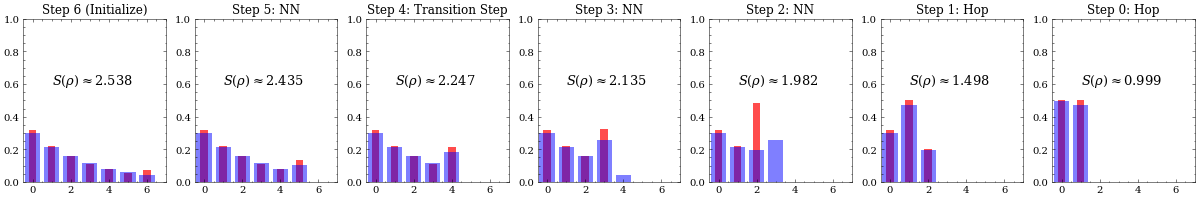

In [66]:
# Histogram of Schmidt Coefficients for Quantum Protocol:

#if nc<nt:
  # extra_terms_to_list = 2
#if nc>=nt:
  # extra_terms_to_list = 1


# Get the classical coefficients to plot
Bell_Q = generateBellstate_reduced(N_C + 1)
pseudoTMSND_Q = generateTMSS_SMALLvector(atanh(lamb_test), N_C + 1)
tparamsQ, indicesQ, y_vec_list_Q = t_parameters_3(pseudoTMSND_Q, Bell_Q, checkMajorization=False, checkLength=False)
# # Reverse classical coefficients:
y_vec_list_Q.reverse()


# Plot the Fock state distribution

# pseudoTMSND_1 = generateTMSSvector(atanh(lamb_test), N_C+1)  #generate R-vector for plotting in background
width_bar = 0.8 #width of bars in plot

fig, axes = plt.subplots(nrows = 1, ncols = N_C+1, figsize=(3*len(TMSS_list), 3))
entanglement_entropy_lst_classical = [] #stores entanglement entropy at each step of the transformation (classical)
entanglement_entropy_lst_quantum = [] #stores entanglement entropy at each step of the transformation (quantum)
entanglement_entropy_lst_quantum_norm_fixed = []
TMSS_norm_lst = []
N_norm = 0  #placeholder for the normalization coefficient at each step, initialize
N_norm_lst = [] #stores the N_norm value at each step
use_norm_adjusted_calculation = True

for idx, lst in enumerate(TMSS_list):

    N_transition = find_Transition_N_SMALL(lamb_test)
    # plot classical coefficients:
    axes[idx].bar(np.arange(0, N_C+1), y_vec_list_Q[idx], width=0.5*width_bar, color="r", alpha=0.7, label = 'Classical')
    entanglement_entropy_lst_classical.append(entanglement_entropy_schmidt_form(y_vec_list_Q[idx]))

    # plot Fock-state distribution:
    if (use_norm_adjusted_calculation==True):
      N_norm = sum_arr_till_index(TMSS_list[idx], len(TMSS_list[idx])) #compute the norm at each step 
      N_norm_lst.append(N_norm)
      TMSS_norm_lst = [i/N_norm for i in TMSS_list[idx]] #normalized TMSS_list by dividing by 1/N^2
      # print(idx, TMSS_list[idx], N_norm, TMSS_norm_lst) 
      entanglement_entropy_lst_quantum_norm_fixed.append(entanglement_entropy_schmidt_form(TMSS_norm_lst))  #norm-adjusted entanglement entropy 
      axes[idx].bar(np.arange(0, N_C+1), lst, width=width_bar, color="b", alpha=.5, label = 'Quantum')  #TMSS_norm_lst or lst 
      axes[idx].set_ylim(0, 1)
      axes[idx].set_xlim(-0.5, N_C+1)
      axes[idx].text(1, 0.6, r"$S(\rho) \approx$" + str(round(entanglement_entropy_schmidt_form(TMSS_norm_lst), 3)), fontsize = 13)

    if (use_norm_adjusted_calculation==False):
      axes[idx].bar(np.arange(0, N_C+1), TMSS_list[idx], width=width_bar, color="b", alpha=.5, label = 'Quantum')  #lst
      axes[idx].set_ylim(0, 1)
      axes[idx].set_xlim(-0.5, N_C+1)
      entanglement_entropy_lst_quantum.append(entanglement_entropy_schmidt_form(lst))
      axes[idx].text(1, 0.6, r"$S(\rho) \approx$" + str(round(entanglement_entropy_schmidt_form(lst), 3)), fontsize = 13)

    if idx == 0:
      axes[idx].set_title("Step "+ str(N_C-idx)+ " (Initialize)")
      # axes[idx].text(1, 0.6, r"$S(\rho) =$" + str(round(entanglement_entropy_schmidt_form(lst), 3)), fontsize = 13) #in classical case the Bell state entanglement entropy = 1 exactly 
    if idx > N_transition:
      axes[idx].set_title("Step "+ str(N_C-idx)+ ": Hop")
    if idx < N_transition and idx > 0:
      axes[idx].set_title("Step "+ str(N_C-idx)+ ": NN")
    if N_C-idx == N_transition:
      axes[idx].set_title("Step "+ str(N_C-idx)+ ": Transition Step")
    if idx == N_transition:
      axes[idx].set_title("Step "+ str(N_C-idx)+ ": NN")
fig.show()
# 

print(entanglement_entropy_lst_quantum_norm_fixed)

3D plots for theta, phi idea:

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0, 'z')

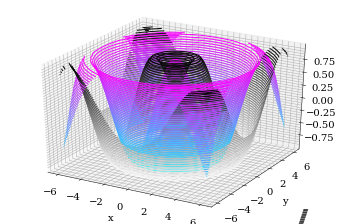

In [67]:
# Example 3D plot
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

def g(x, y):
    return np.cos(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z1 = f(X, Y)
Z2 = g(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z1, 50, cmap='binary')
ax.contour3D(X, Y, Z2, 50, cmap='cool')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in arccos
  del sys.path[0]


Text(0.5, 0, 'phi')

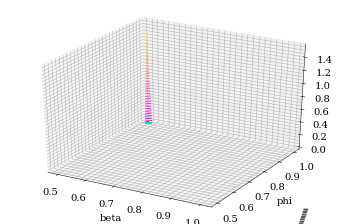

In [68]:
# Theta, phi 3D plot:


def phi(beta, p):
    cos2phi = (2*beta-1-2*beta**2)/((2*beta-1)*(1-p))
    cos_squared_phi = (1+cos2phi)/2
    phi = np.arccos(np.sqrt(cos_squared_phi))
    return cos_squared_phi

def theta(beta, p):
    cos_phi = phi(beta, p)
    cos_theta = cos_phi* np.sqrt((beta*(1-p))/(p*(1-beta)))
    theta = np.arccos(cos_theta)
    return cos_theta**2

perturb = 0.00001
beta = np.linspace(0.5 + perturb, 1- perturb, 30)
p = np.linspace(0.5+ perturb, 1- perturb, 30)

B, P = np.meshgrid(beta, p)
Theta = theta(B, P)
Phi = phi(B, P)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(B, P, Theta, 50, cmap='spring')
ax.contour3D(B, P, Phi, 50, cmap='winter')
ax.set_xlabel('beta')
ax.set_ylabel('phi')
# ax.set_zlabel('z')